# 一、项目简介
在竞争激烈的无线服务行业中，保留客户对公司的成功至关重要。与维护现有客户关系相比，获取新客户不仅更困难，而且成本也高得多。在这个代码中，我将预测一家名为Telco的家庭电话和互联网服务提供商的客户保留行为。首先，我将使用探索性数据分析来理解特征与目标变量之间的关系，并识别预测客户流失的关键因素。利用这些特征，我将开发一个预测模型，帮助公司主动降低他们的流失率，并使用模型的洞察力加强他们的客户保留策略。

目标：
1. 基于数值和类别特征，对潜在的流失客户进行分类。
2. 这是一个对不平衡数据集进行的二分类问题。

# 二、综合信息
## 数据集属性
- **customerID**：客户ID
- **gender**：客户性别（男性或女性）
- **SeniorCitizen**：客户是否为老年人（1代表是，0代表否）
- **Partner**：客户是否有伴侣（是或否）
- **Dependents**：客户是否有家属（是或否）
- **tenure**：客户与公司合作的月数
- **PhoneService**：客户是否有电话服务（是或否）
- **MultipleLines**：客户是否有多条线路（是、否或无电话服务）
- **InternetService**：客户的互联网服务提供商（DSL、光纤或无）
- **OnlineSecurity**：客户是否有在线安全服务（是、否或无互联网服务）
- **OnlineBackup**：客户是否有在线备份服务（是、否或无互联网服务）
- **DeviceProtection**：客户是否有设备保护服务（是、否或无互联网服务）
- **TechSupport**：客户是否有技术支持（是、否或无互联网服务）
- **StreamingTV**：客户是否有流媒体电视服务（是、否或无互联网服务）
- **StreamingMovies**：客户是否有流媒体电影服务（是、否或无互联网服务）
- **Contract**：客户的合同期限（按月、一年、两年）
- **PaperlessBilling**：客户是否采用无纸化账单（是或否）
- **PaymentMethod**：客户的支付方式（电子支票、邮寄支票、银行转账（自动）、信用卡（自动））
- **MonthlyCharges**：每月向客户收取的费用
- **TotalCharges**：向客户收取的总费用
- **Churn**：客户是否流失（是或否）

## 本篇代码内容
1. **数据集信息**：介绍数据集的来源、大小、特征类型（数值型、类别型）等基本信息。
2. **探索性数据分析（EDA）**：对数据进行初步分析，包括数据分布、缺失值处理、异常值检测等，以理解数据的基本情况和潜在问题。
3. **EDA总结**：总结探索性数据分析的主要发现，例如特征之间的关系、数据集的不平衡性等。
4. **特征工程**：基于EDA的发现，进行特征选择、特征构造、数据转换等操作，以改善模型的性能。
5. **建模**：选择合适的机器学习模型进行训练，可能包括模型比较、参数调优等步骤。
6. **结论**：总结模型的性能，提出可能的改进方向，并基于模型结果给出业务建议。

## 将会看到
1. **数据可视化**：使用图表和图形直观展示数据，帮助理解数据分布和特征间关系。
2. **数据缩放**：标准化或归一化数据，以提高某些算法的性能。
3. **特征选择的统计测试**：运用统计方法（如卡方检验、ANOVA）评估特征与目标变量的相关性，帮助选择重要特征。
4. **算法的建模及结果可视化**：训练机器学习模型并通过图表展示结果，以便评估和比较不同模型的性能。
5. **平衡不平衡数据集**：应用过采样、欠采样或合成数据生成技术来处理数据不平衡问题。
6. **模型超参优化**：通过参数调整技术找到模型的最优参数。
7. **分类器的堆叠**：组合多个模型以提高预测准确率。

## 涉及技术
1. **二元分类**：描述了处理二元分类问题的方法。Notebook中包含了对数据集的操作，并通过易于理解的代码解释进行了说明。二元分类是一种常见的机器学习问题，目标是将实例分为两个类别。

2. **时间序列分析**：Notebook介绍了时间序列分析的基础。时间序列分析涉及对随时间变化的数据序列进行分析，以识别其中的模式、趋势或周期性。Notebook中包含了对数据集的操作，并提供了易于理解的代码解释。

3. **无监督学习**：Notebook描述了使用K-Means聚类算法处理无监督学习问题的工作。无监督学习是一种机器学习方法，目的是在没有给定任何显式指导的情况下发现数据中的模式或结构。K-Means是一种流行的聚类算法，用于将数据点分组成若干个簇，使得同一簇内的点相互之间比其他簇的点更相似。

# 三、数据概况

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 配置 Matplotlib 和 Pandas，改善图形显示和数据格式
plt.rcParams['figure.figsize'] = [10, 6]  # 设置默认图形大小为10x6英寸
pd.set_option('display.float_format', '{:.2f}'.format)  # 设置数据显示格式，避免使用科学计数法
###
'display.float_format'：这是 pandas 中的一个设置选项，用于指定浮点数的显示格式。
'{:.2f}'.format：这是一个格式化函数，表示将浮点数格式化为字符串并保留两位小数。

'{:.2f}' 是一个格式化字符串，具体含义如下：
{}：这是一个占位符，表示将在这里插入一个值。
:.2f：这里的 : 后面指定了格式：
.2：表示保留两位小数。
f：表示格式为浮点数（即表示小数）。
因此，'{:.2f}' 的意思是将一个浮点数格式化为字符串，且只显示两位小数。例如，3.14159 会被格式化为 "3.14"。
###
pd.set_option('display.max_columns', None)  # 显示 DataFrame 的所有列
###
pd.set_option：这是 Pandas 提供的一个函数，用于设置显示选项。
'display.max_columns'：这是一个选项，用于控制 DataFrame 显示时最多显示的列数。
None：表示不限制列数，即可以显示所有列。
###
plt.style.use('ggplot')  # 使用 ggplot 风格，使图形更美观
###
plt.style.use：这是 Matplotlib 库中的一个函数，用于设置绘图样式。
'ggplot'：这是一个预定义的样式名称，模仿了 R 语言中的 ggplot2 绘图库的风格。
###

# 忽略警告信息，使输出更干净
import warnings
warnings.filterwarnings('ignore')
###
import warnings：导入 Python 的 warnings 模块，用于处理警告信息。
warnings.filterwarnings('ignore')：设置过滤器来忽略所有警告信息，不显示它们。
###

# 你的数据处理和可视化代码放这里


In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

数据信息：

In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- **类型信息**：显示这是一个 `<class 'pandas.core.frame.DataFrame'>` 类型的对象，意味着这个数据结构由 pandas 库提供，用于存储表格数据。

- **范围索引**（RangeIndex）：`7043 entries, 0 to 7042` 表示这个 DataFrame 有 7043 行数据，索引（即行号）从 0 到 7042。

- **列信息**（Data columns）：共有 21 列数据，每一列的名称、非空值计数和数据类型都列在了下面的表中。

  - **列名称**（Column）：列出了所有列的名称，如 `customerID`, `gender`, `SeniorCitizen` 等。
  
  - **非空值计数**（Non-Null Count）：每列有多少个非空（non-null）条目，这里每列都是 7043，意味着没有缺失值。
  
  - **数据类型**（Dtype）：显示了每列的数据类型，如 `object`（通常用于表示字符串类型）、`int64`（64位整数）、`float64`（64位浮点数）。
    - 其中 `object` 类型的列有 18 个，通常包含文本或混合类型的数据。
    - `int64` 类型的列有 2 个，表示存储的是整数。
    - `float64` 类型的列有 1 个，表示存储的是浮点数，具体到这个例子中，是 `MonthlyCharges` 列。

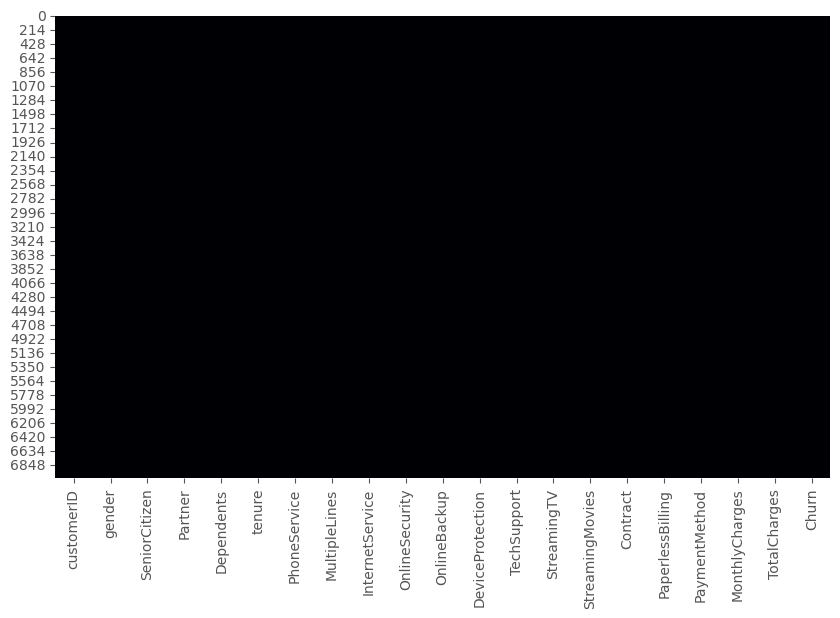

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

在Python中，`sns.heatmap` 是Seaborn库中的一个函数，用于绘制热力图。热力图是一种数据可视化技术，可以显示矩阵中数值的大小，并通过不同的颜色来表示这些数值。

`sns.heatmap(data.isnull(), cmap = 'magma', cbar = False);`，正在做以下几件事情：
1. `data.isnull()`：这个表达式检查`data`数据框架（可能是pandas的DataFrame）中的每个值，并返回一个布尔数据框架，其中`True`表示缺失值（NaN），`False`表示非缺失值。
2. `sns.heatmap()`：这是Seaborn库中用于绘制热力图的函数。
3. `cmap = 'magma'`：这指定了热力图的颜色映射方案。'magma'是一种颜色方案，它从蓝色（低值）渐变到红色（高值）。在缺失值的情况下，`True`会被视为高值，因此在热力图中缺失值会显示为红色或红色阴影。
4. `cbar = False`：这个参数设置为`False`，表示不要在热力图旁边显示颜色条（color bar）。颜色条通常用来表示颜色和数值之间的对应关系。

这行代码的作用是生成一个热力图，用来可视化数据框架中缺失值的位置，其中缺失值以红色显示，没有缺失值的地方以其他颜色显示，并且不显示颜色条。

全是黑的意味着这份数据中基本上没有空值

In [7]:
data.describe().T

count  mean   std   min   25%   50%   75%    max
SeniorCitizen  7043.00  0.16  0.37  0.00  0.00  0.00  0.00   1.00
tenure         7043.00 32.37 24.56  0.00  9.00 29.00 55.00  72.00
MonthlyCharges 7043.00 64.76 30.09 18.25 35.50 70.35 89.85 118.75

describe为描述性统计分析

.T代表将结果的转置（transpose）显示出来。通常用来将列统计转换为行统计

1. 数据集中有太多带有文本数据的特征，这些特征很可能是分类特征！
2. “总费用”是一个包含数值的特征，但是存储为字符串数据类型。首先，我们将把这一列转换成浮点数。

# 将字符串数据类型（总费用）转换成浮点数数据类型

In [8]:
# 计算'TotalCharges'列中每个元素的空格数
l1 = [len(i.split()) for i in data['TotalCharges']]
###
l1 是一个列表，通过列表推导式创建。
for i in data['TotalCharges']：这个循环遍历了 data DataFrame 中名为 ‘TotalCharges’ 的列的每一个元素。
i.split()：对每个元素调用 split() 方法，该方法将字符串分割成多个子字符串，默认以空格为分隔符。
len(i.split())：计算分割后的子字符串列表的长度，这个长度实际上就是原字符串中的空格数量加一（因为分割后的子字符串数量比空格数量多一个）。
所以，l1 中的每个元素表示 ‘TotalCharges’ 列中对应元素的空格数量。
###

# 找出所有包含空格（实际上是空字符串或多于一个元素的情况）的索引位置
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ', *l2)
###
*l2：使用星号操作符解包 l2 列表，这样就可以将列表中的每个索引作为单独的参数传递给 print 函数。
###

# 对于所有发现的有问题的索引，使用前一个索引位置的值进行替换
for i in l2:
    data.loc[i, 'TotalCharges'] = data.loc[(i-1), 'TotalCharges']
###
这个循环遍历 l2 列表中的每个索引。
data.loc[i, 'TotalCharges']：选择 ‘TotalCharges’ 列中索引为 i 的元素。
data.loc[(i-1), 'TotalCharges']：选择 ‘TotalCharges’ 列中索引为 i-1 的元素。
这行代码将 ‘TotalCharges’ 列中每个有问题的元素的值替换为前一个元素的值。
###

# 将'TotalCharges'列转换为浮点数，这里假设经过上述处理后所有值都可以转换
data['TotalCharges'] = data['TotalCharges'].astype(float)
###
这行代码将 ‘TotalCharges’ 列的数据类型转换为浮点数。
.astype(float) 是一个方法，它尝试将列中的每个值转换为浮点数类型。
###

# 删除'customerID'列，因为可能不需要或为了数据处理的简化
data.drop(columns = ['customerID'], inplace = True)
###
这行代码从 data DataFrame 中删除名为 ‘customerID’ 的列。
columns = ['customerID'] 指定要删除的列名。
inplace = True 表示直接在原始 DataFrame 上进行删除操作，而不是创建一个新的 DataFrame。
###

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


这段代码的主要功能是处理 `TotalCharges` 列中的数据，确保所有值都能够被转换为浮点数（float）。它通过以下步骤实现这一点：

1. 遍历 `TotalCharges` 列中的每个值。
2. 尝试将每个值转换为浮点数。
   - 如果转换成功，该值就直接被更新为其浮点数形式。
   - 如果转换失败（通常是因为该值是空字符串或包含非数字字符，导致 `ValueError`），则会根据其位置采取不同的处理策略：
     - 如果当前值不是位于第一行，它会被替换为其前一个值。
     - 如果当前值位于第一行（即 `i=0`），由于没有前一个值可用，它会被设置为0或其他定义的默认值。
3. 在所有 `TotalCharges` 值处理完成后，该列中的所有元素都将被安全转换为浮点数类型，因为所有非数字字符串已经被处理。
4. 最后，代码删除了 `customerID` 列以简化后续分析。

# 对类别特征进行标签编码

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
###
从 sklearn.preprocessing 模块导入 LabelEncoder 类，并创建一个 LabelEncoder 实例赋值给变量 le。
LabelEncoder 是一个用于将分类特征转换为数值的预处理工具。
###

# 创建数据副本以避免修改原始DataFrame
df1 = data.copy(deep=True)
###
创建 data DataFrame 的深拷贝，并将其赋值给 df1。
使用 deep=True 确保复制的是数据的完整副本，而不是简单地复制引用。
###

# 筛选出文本数据特征列（即非数值型特征列）
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]
###
创建一个列表 text_data_features，包含所有非数值型特征列的名称。这是通过以下步骤完成的：
list(data.columns) 获取 DataFrame 中所有列的名称。
data.describe().columns 获取 DataFrame 中数值型列的名称（describe() 方法默认返回数值型列的统计摘要）。
列表推导式筛选出不在数值型列名称列表中的列名称。
###

print('Label Encoder Transformation')
for i in text_data_features:
    # 对每个文本数据特征列应用LabelEncoder
    df1[i] = le.fit_transform(df1[i])
    ###
    这里 le 是一个 LabelEncoder 对象。fit_transform 方法首先使用 df1[i]（即当前列的数据）来
    训练 LabelEncoder（也就是学习如何将每个独特的文本标签转换成数字），然后使用这个训练好的 LabelEncoder 来转换整个列。
    df1[i] = ...：将转换后的数值数据赋值给 df1 DataFrame 的当前列 i。
    ###
    print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))
    ###
    i：当前处理的列名。
    df1[i].unique()：转换后该列中的唯一值（数值形式）。
    le.inverse_transform(df1[i].unique())：使用 inverse_transform 方法将数值形式的唯一值转换回原始的文本标签。
    ###

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


1. **创建标签编码器**：利用 `LabelEncoder` 对分类特征进行编码。这对于将文本数据转换为模型可处理的数值形式是必需的。
   
2. **深拷贝数据框架**：为了不在原始数据集 `data` 上直接修改，通过深拷贝创建一个新的数据框架 `df1`。

3. **识别分类特征**：通过排除那些已经是数值类型的列（即 `data.describe().columns`），找出所有文本（分类）特征。

4. **标签编码转换**：遍历每个分类特征，使用 `LabelEncoder` 进行编码，并打印每个特征的唯一编码值及其对应的原始文本值，以便了解编码前后的对应关系。

In [10]:
df1.describe()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
count 7043.00        7043.00  7043.00     7043.00 7043.00       7043.00   
mean     0.50           0.16     0.48        0.30   32.37          0.90   
std      0.50           0.37     0.50        0.46   24.56          0.30   
min      0.00           0.00     0.00        0.00    0.00          0.00   
25%      0.00           0.00     0.00        0.00    9.00          1.00   
50%      1.00           0.00     0.00        0.00   29.00          1.00   
75%      1.00           0.00     1.00        1.00   55.00          1.00   
max      1.00           1.00     1.00        1.00   72.00          1.00   

       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
count        7043.00          7043.00         7043.00       7043.00   
mean            0.94             0.87            0.79          0.91   
std             0.95             0.74            0.86          0.88   
min             0.00             0.00            0.00          0.00   
25%             0.00             0.00            0.00          0.00   
50%             1.00             1.00            1.00          1.00   
75%             2.00             1.00            2.00          2.00   
max             2.00             2.00            2.00          2.00   

       DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
count           7043.00      7043.00      7043.00          7043.00   7043.00   
mean               0.90         0.80         0.99             0.99      0.69   
std                0.88         0.86         0.89             0.89      0.83   
min                0.00         0.00         0.00             0.00      0.00   
25%                0.00         0.00         0.00             0.00      0.00   
50%                1.00         1.00         1.00             1.00      0.00   
75%                2.00         2.00         2.00             2.00      1.00   
max                2.00         2.00         2.00             2.00      2.00   

       PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges   Churn  
count           7043.00        7043.00         7043.00       7043.00 7043.00  
mean               0.59           1.57           64.76       2285.17    0.27  
std                0.49           1.07           30.09       2267.54    0.44  
min                0.00           0.00           18.25         18.80    0.00  
25%                0.00           1.00           35.50        401.68    0.00  
50%                1.00           2.00           70.35       1398.25    0.00  
75%                1.00           2.00           89.85       3803.05    1.00  
max                1.00           3.00          118.75       8684.80    1.00

# 初步查看目标特征和其他特征平均值的关系

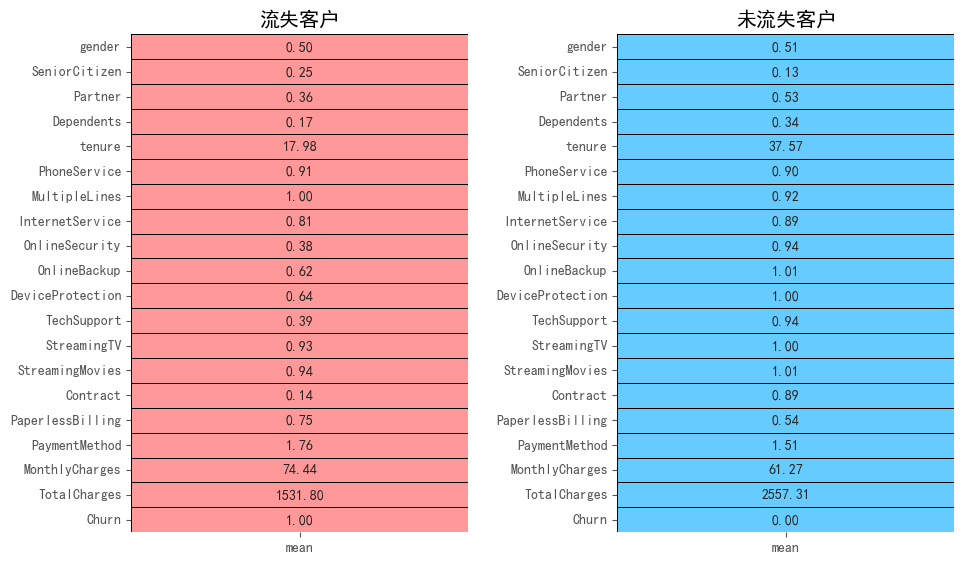

In [11]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负数轴标签显示问题
###
这两行代码解决了在使用matplotlib绘图时显示中文的问题。
第一行设置绘图使用的字体为 ‘SimHei’，这是支持中文显示的一种字体。
第二行解决了负号在坐标轴上显示为方块的问题。
###

# 更新颜色方案
colors = ["#FF9999", "#66CCFF"]  # 浅粉红和浅蓝色
###
这里定义了一个颜色列表 colors，包含两种颜色，分别用于表示流失客户和未流失客户的热图。
###

# 继续使用describe().T获取流失和未流失客户的描述性统计
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

# 创建子图，采用新的figsize以更好地展示数据
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
###
plt.subplots(nrows=1, ncols=2, figsize=(10, 6)) 是一个函数调用，它来自 matplotlib 库，用于创建一个新的图形和一组子图（axes）。
nrows=1：指定子图行数。这里设置为1，意味着子图只有一行。
ncols=2：指定子图列数。这里设置为2，意味着子图有两列。
figsize=(10, 6)：设置图形的大小，以英寸为单位。这里的设置表示图形的宽度是10英寸，高度是6英寸。

fig, ax = ...：这行代码将 subplots 函数返回的两个对象分别赋值给 fig 和 ax 变量。
fig 是图形对象，你可以使用它来设置整个图形的属性，比如标题、大小等。
ax 是一个包含两个子图对象的数组（因为 nrows=1 和 ncols=2）。你可以使用 ax 来控制每个子图的内容，比如绘制数据、设置标题、轴标签等。
###

# 为了更好地区分两个类别，使用不同的颜色映射
# 绘制流失客户数据的热图
sns.heatmap(churn[['mean']], annot=True, cmap=[colors[0]], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[0])
ax[0].set_title('流失客户')
###
使用 sns.heatmap 函数绘制流失客户数据的热图，只显示平均值列。参数解释如下：
churn[['mean']]：选择流失客户的平均值数据。
annot=True：在热图上显示数值。
cmap=[colors[0]]：使用浅粉红色作为颜色映射。
linewidths=0.4 和 linecolor='black'：设置单元格边框的宽度和颜色。
cbar=False：不显示颜色条。
fmt='.2f'：设置数值格式为两位小数。
ax=ax[0]：指定第一个子图用于绘制。
ax[0].set_title('流失客户')：设置第一个子图的标题。
###

# 绘制未流失客户数据的热图
sns.heatmap(not_churn[['mean']], annot=True, cmap=[colors[1]], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f', ax=ax[1])
ax[1].set_title('未流失客户')
###
churn[['mean']] 和 churn['mean'] 都可以用来选择名为 ‘mean’ 的列，但它们返回的对象类型不同。
churn[['mean']] 返回 DataFrame，而 churn['mean'] 返回 Series。
churn[mean] 只有在 mean 是一个有效的变量时才可能正确，它也可能返回一个 Series，具体取决于 mean 变量的值。
###

# 优化布局
fig.tight_layout(pad=2)
###
pad=2 是一个参数，它指定了子图之间的填充距离。这里的 pad 值以磅为单位（1磅等于1/72英寸），设置为2意味着子图之间的间距是2磅。
当你在图形中绘制多个子图时，有时会遇到子图的标签、标题或刻度标签相互重叠的问题。
使用 .tight_layout() 方法可以帮助解决这些问题，它通过计算子图的大小和位置来自动调整它们，以避免重叠。
###

流失客户的平均在网时长为17.98个月，相较之下，继续使用服务的客户平均在网时长为37.57个月。不流失客户在在线安全、在线备份、设备保护和技术支持等特征的平均值高于流失客户。这可以作为一个很好的指标或关注点！与不流失的客户相比，流失客户的合同价值要小得多。流失客户的平均每月费用为74.44，高于不流失客户的61.27。不流失客户的总费用为2557.31，高于流失客户的1531.80。从这些平均值来看，我们可以说，某些特征显示出明显的差异，这有助于更加关注流失客户以确保他们保留服务。

数据集中有太多的分类特征，因此特征的平均值都在0附近。我们现在将继续进行探索性数据分析（EDA）部分，并更详细地查看这些特征！

# 四、数据探索分析（EDA）

## 将特征划分为类别特征和数值特征
将特征划分为数值型和类别型特征通常是数据预处理的一部分，有助于我们根据特征的类型采取不同的分析和处理方法。以下是如何进行划分的一个示例：

- **数值型特征（Numerical Features）**：这些是量化的数据，可以进行数学计算。数值型特征通常包括年龄、收入、月费用等。

- **类别型特征（Categorical Features）**：这些特征表示的是类别或标签，通常用于表示不同的群体、类型或类别，如性别、国籍、产品类型等。

在进行数据分析时，对这两种类型的特征采取的处理方法会有所不同。例如，我们可能会对数值型特征进行归一化或标准化，以便用于机器学习模型；而类别型特征则可能需要进行编码（如独热编码或标签编码）以便模型可以理解。

In [12]:
# col 存储 df1 中所有列的名称
col = list(df1.columns)

# 使用列表推导式分别生成分类特征和数值特征列表
categorical_features = [i for i in col if len(df1[i].unique()) <= 6]
###
这是一个列表推导式，它遍历 col 列表中的每个列名 i，并检查 df1[i]（即 df1 DataFrame 中列 i 的数据）的唯一值数量是否小于或等于6。
如果是，则将该列名添加到 categorical_features 列表中。
###
numerical_features = [i for i in col if len(df1[i].unique()) > 6]

# 使用中文注释说明代码意图
# 打印分类特征
print('Categorical Features:', *categorical_features)
# 打印数值特征
print('Numerical Features:', *numerical_features)
###
星号操作符 * 用来解包 categorical_features 和 numerical_features 列表，使得每个特征名称都能单独打印。
###

Categorical Features: gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features: tenure MonthlyCharges TotalCharges


这里，如果属性的唯一元素少于6个，则被定义为类别型特征；否则，它是数值型特征。通常，根据属性元素的数据类型来划分特征也是一种典型的方法。例如：数据类型为整数时，属性为数值型特征；数据类型为字符串时，属性为类别型特征。

对于这个数据集，由于特征数量较少，我们也可以手动检查数据集。

## 目标特征可视化（饼图、立方计数图）

In [1]:
# 计算客户流失和非流失的比例
churn_rates = df1['Churn'].value_counts(normalize=True) * 100  # 直接计算百分比
###
df1是数据框，其中包含客户流失信息。
value_counts()函数统计Churn列中每个值的出现次数。
normalize=True参数将统计结果转换为比例，即每个值占总数的比例。
* 100：将比例乘以100，转化为百分比格式。
###

# 创建绘图区域
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
###
nrows=1：指定子图的行数为1，即只创建一行。
ncols=2：指定子图的列数为2，即在这一行中创建两个子图。
figsize=(20, 5)：指定整个图形的大小为20英寸宽，5英寸高。
最终，fig保存整个图形对象，axs是一个数组，包含两个子图的Axes对象，可以用于分别绘制两个图。
###

# 绘制饼图
plt.subplot(1, 2, 1)#指定在1行2列的布局中，选择第1个子图进行绘制。
plt.pie(churn_rates, labels=['Not-Churn Customers', 'Churn Customers'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
###
使用plt.pie()函数绘制饼图。
churn_rates：饼图的数据，代表流失客户和非流失客户的比例。
labels=['Not-Churn Customers', 'Churn Customers']：设置饼图对应的标签，分别为“非流失客户”和“流失客户”。

autopct='%1.1f%%'：在饼图中显示每个部分的百分比，保留一位小数。
%1.1f：表示浮点数格式，1.1 指的是总共显示的字符数（包括小数点前的数字）为1位，且小数点后保留1位小数。
%%：用来表示百分号（%），因为在格式字符串中，% 需要用两个%来表示一个实际的百分号。

startangle=90：饼图从90度位置开始绘制。

explode=(0.1, 0)：将第一个扇区(非流失客户)稍微突出，以增强视觉效果。
0.1：表示第一个扇区（通常对应第一个标签，如“非流失客户”）向外突出0.1个单位。
0：表示第二个扇区（通常对应第二个标签，如“流失客户”）不突出，保持在饼图的原位置。

colors=colors：指定扇区的颜色。
wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}：设置扇区的边框颜色为黑色，线宽为1，并启用抗锯齿功能。
wedgeprops：用于定义饼图扇区的绘图属性。
'edgecolor': 'black'：设置扇区的边框颜色为黑色。
'linewidth': 1：设置边框的线宽为1个单位。
'antialiased': True：启用抗锯齿功能，使边缘更加平滑，视觉效果更佳。
###
plt.title('Churn - Not-Churn %')

# 绘制计数图
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Churn', data=df1, palette=colors, edgecolor='black')  # 直接使用df1
###
x='Churn'：表示条形图的 x 轴数据来自于名为“Churn”的列。
data=df1：指定数据源为数据框 df1。
palette=colors：指定颜色调色板为变量 colors。
edgecolor='black'：设置条形的边框颜色为黑色。
###
# 在条形图上添加数据标签
for rect in ax.patches:#遍历当前坐标轴 (ax) 中的所有矩形图形（条形）。
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, '%d' % rect.get_height(), ha='center', fontsize=11)
    ###
    rect.get_x()：获取当前条形的 x 坐标（左边界）。
    rect.get_width()：获取条形的宽度。
    rect.get_x() + rect.get_width() / 2：计算条形的中间横坐标，确保文本在条形的中央。
    
    rect.get_height()：获取当前条形的高度。
    rect.get_height() + 2：设置文本的纵坐标，在条形的顶部稍微偏上 2 个单位的位置，以便文本不与条形重叠。
    
    '%d' % rect.get_height()：这是一个字符串格式化操作，旨在将条形的高度转换为字符串格式。
    %d 表示将一个整数格式化为十进制形式，rect.get_height()获取条形的高度（整数值）。
    
    ha='center'：这是 ax.text() 函数的一个参数，表示文本的水平对齐方式。
    'center'：文本在 x 轴方向上居中显示。
    
    fontsize=11：这是设置文本字体大小的参数。
    11：字体大小设置为 11 点。
###
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])
###

###

plt.title('Number of Churn - Not-Churn Customers')
plt.show()

SyntaxError: invalid character '：' (U+FF1A) (3887692859.py, line 4)

数据集在未流失客户与流失客户之间的比例大约为3:1，这导致预测结果将偏向于未流失客户。可视化展示也会显示出这种偏差。

# 分类特征与目标变量（Churn）：

In [14]:
#从 categorical_features 这个列表中移除 'Churn' 这个元素
categorical_features.remove('Churn')
###
categorical_features：这是一个包含多个分类特征名称的列表。
.remove('Churn')：这个方法用于从列表中删除指定的元素 'Churn'。
###

In [15]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information客户信息
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!支付服务
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information支付信息

当数据集中包含大量分类特征时，将这些特征分成几个组是一个有效的策略。这样做可以帮助我们更有组织地分析数据，并根据不同特征组的特性来采用相应的数据预处理或特征工程策略。

## 分组1：包含客户基本信息的分类特征与目标特征的关系分布（柱状图）

在数据可视化中，子图（subplot）是指在一个大图形窗口中的一个小区域，用于单独展示一个图表或多个图表的一部分。

每次画图时创建一个子图布局是为了能够在同一个图形窗口中展示多个图表，这有助于比较和分析数据。

使用子图布局的好处包括：

节省空间：在一个图形窗口中展示多个图表，而不是每个图表都单独打开一个窗口。
便于比较：可以直观地比较不同图表的数据或趋势。
统一风格：所有图表都在同一个图形窗口中，因此可以统一设置风格和格式。
代码简洁：只需要创建一个图形对象和相应的子图数组，就可以绘制多个图表。
在实际应用中，子图布局的灵活性非常高，可以根据需要创建不同数量的子图，并调整它们的布局。

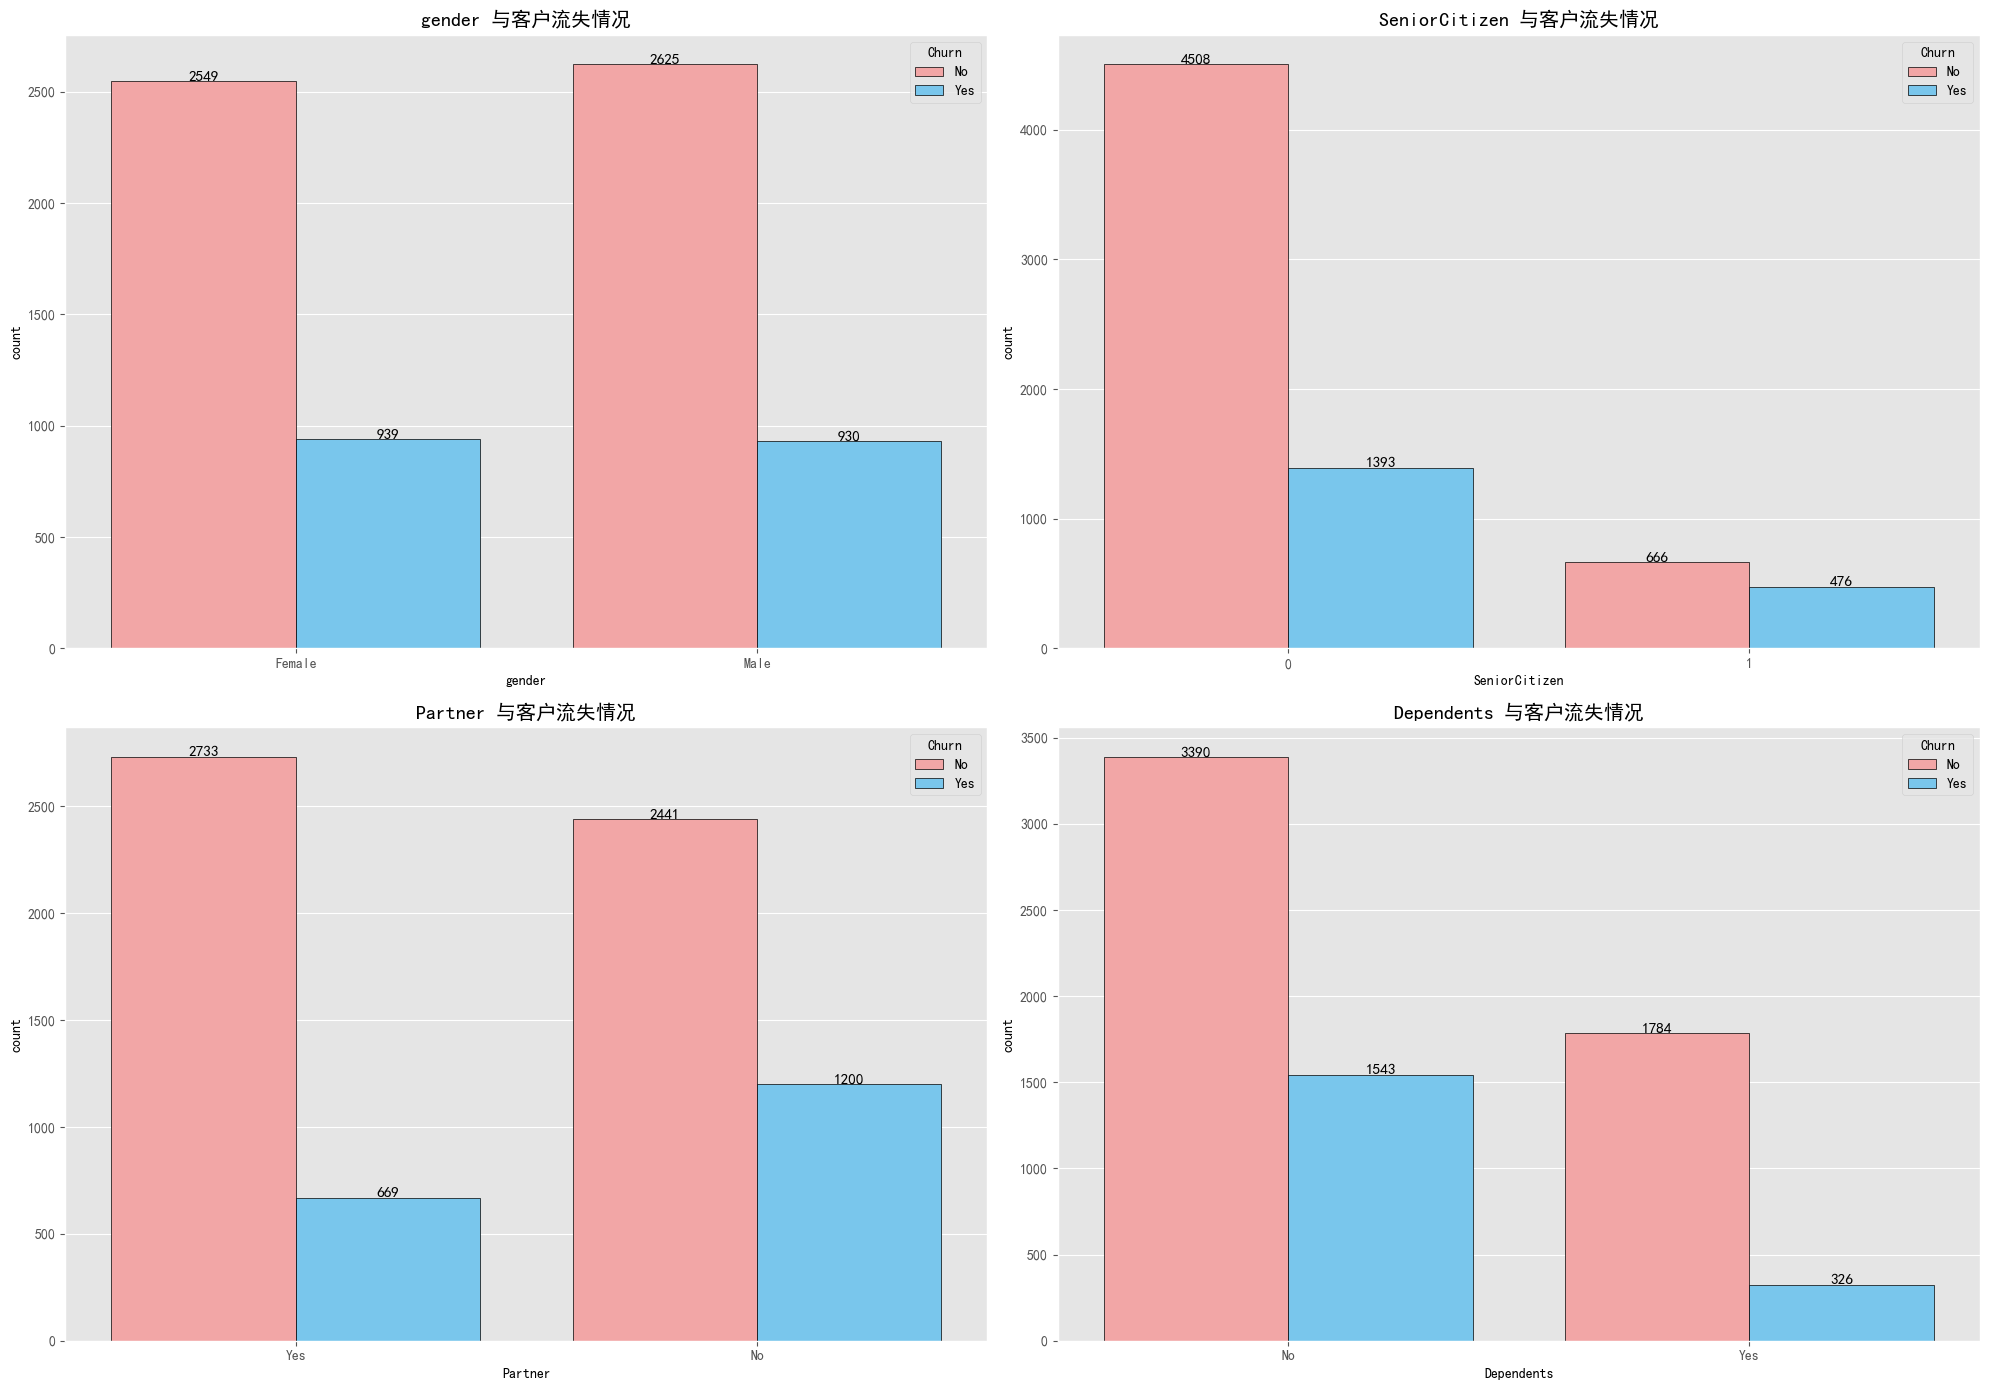

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))#创建一个 2 行 2 列的子图布局，整个图像的大小为 20x14 英寸。
###
fig：代表整个图形窗口的对象。
axs：是一个包含多个 Axes 对象的数组，每个 Axes 对象代表一个子图。
###

for i, feature in enumerate(l1):#对 l1 列表中的每个特征进行迭代，i 是索引，feature 是特征名称。
    plt.subplot(2, 2, i + 1)#在 2x2 的网格中选择当前索引位置绘制子图。
    ax = sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black')  # 使用变量feature简化代码
    ###
    使用 Seaborn 库绘制计数条形图，
    x 轴为当前特征，
    data 为数据集，
    hue="Churn" 表示根据客户流失情况进行颜色分组，
    palette 指定颜色方案，
    edgecolor='black' 为条形图添加黑色边框。
    ###
    # 在条形图上添加数据标签
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, '%d' % rect.get_height(), ha='center', fontsize=11)
    # 使用中文标题，并将Churn翻译为客户流失情况
    plt.title(f'{feature} 与客户流失情况')

plt.tight_layout()  # 调整子图间距
plt.show()

男性和女性客户的流失情况非常相似！
同样，高龄客户的数量相当低。在此基础上，我们可以观察到大约40%的高龄客户流失率。总共有476名高龄客户流失，占1142名高龄客户的总数。
与不与伴侣同住的客户相比，有伴侣同住的客户流失率较低。
同样，没有家属的客户流失率较高！

## 分组2：包含客户签订的服务的分类特征与目标特征的关系分布（柱状图）

为了可视化更清楚，我们将这块分成两组

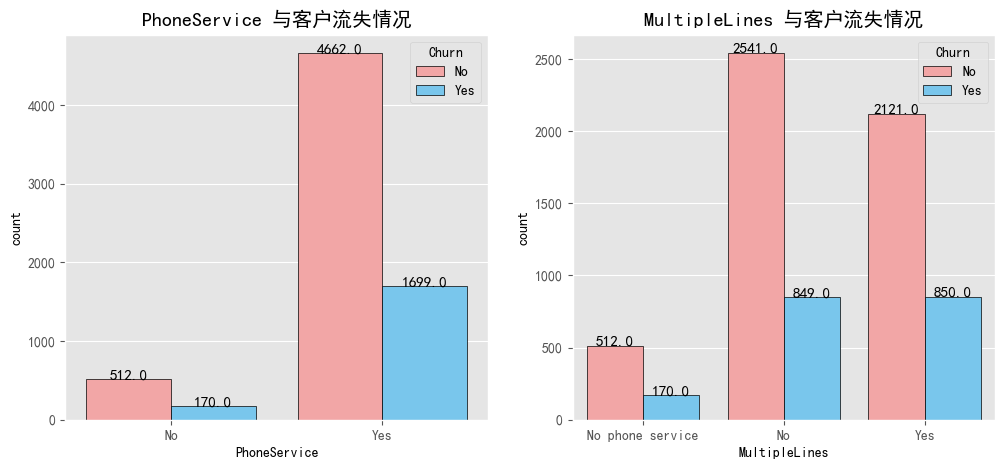

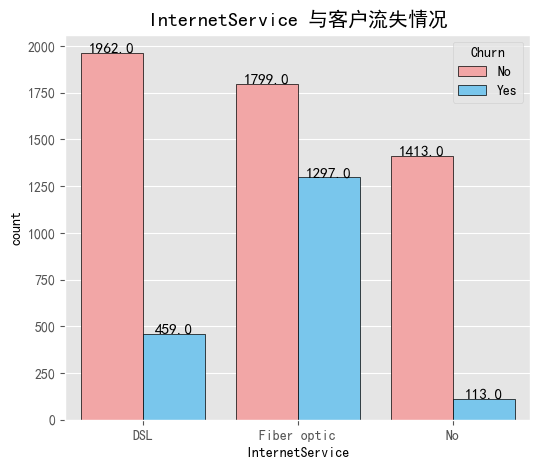

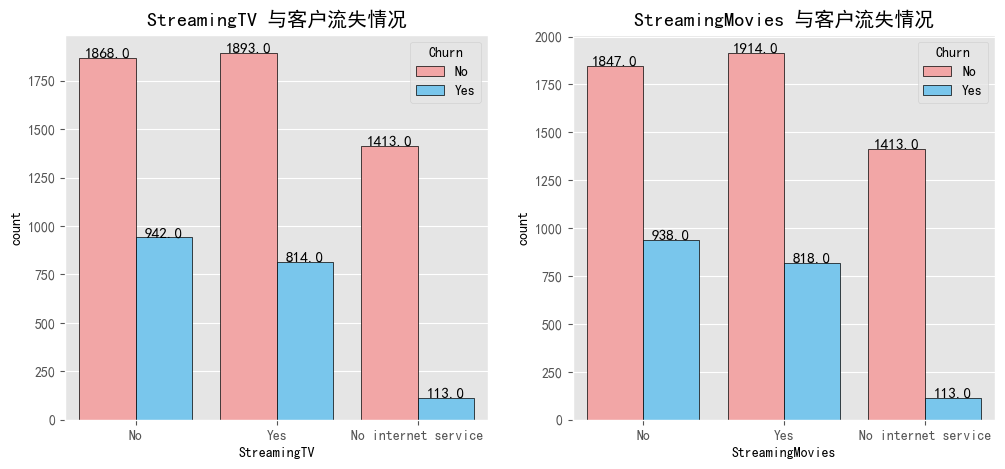

In [17]:
# 首先处理前两个图表
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i in range(2):  # 由于只处理前两个元素，可以直接用范围2;在循环中，i 的值会依次是 0 和 1。
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(x=l2[i], data=data, hue="Churn", palette=colors, edgecolor='black')
    # 在条形图上添加数据标签
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), ha='center', fontsize=11)
    # 将标题设置为中文
    plt.title(f'{l2[i]} 与客户流失情况')

# 处理第三个图表，单独创建一个图形
fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(x=l2[2], data=data, hue="Churn", palette=colors, edgecolor='black')
# 在条形图上添加数据标签
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), ha='center', fontsize=11)
# 将标题设置为中文
plt.title(f'{l2[2]} 与客户流失情况')

# 处理最后两个图表，再次创建图形
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, feature in enumerate(l2[3:5]):  # 使用enumerate简化循环
    plt.subplot(1, 2, i + 1)
    ax = sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black')
    # 在条形图上添加数据标签
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), ha='center', fontsize=11)
    # 将标题设置为中文
    plt.title(f'{feature} 与客户流失情况')

尽管没有电话服务，但保留的客户数量相比放弃服务的客户来说更多。在多线服务的情况下，无论是否存在多线服务，客户的流失率都是相同的。许多客户对使用光纤光缆提供互联网服务表现出了抵触情绪。相反，从上图可以看出，客户更喜欢使用DSL作为他们的互联网服务！无论是否订阅了StreamingTV和StreamingMovies，都有大量客户流失。看起来流媒体内容并不完全是问题所在！

在 ax.text() 函数的调用中，参数 ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), ha='center', fontsize=11) 对应于 ax.text() 函数的以下参数：

x 或 x：
rect.get_x() + rect.get_width() / 2 对应于 x 参数，它是文本的水平位置。这里，我们首先获取条形的左上角 x 坐标（rect.get_x()），然后加上条形的宽度除以2（rect.get_width() / 2），以得到条形中心点的 x 坐标。！！！先除后加

y 或 y：
rect.get_height() + 2 对应于 y 参数，它是文本的垂直位置。这里，我们首先获取条形的高度（rect.get_height()），然后加上2，以避免文本被条形覆盖。

s 或 text：
rect.get_height() 对应于 s 参数，它是文本的内容。这里，我们直接使用条形的高度作为文本内容。

ha 或 horizontalalignment：
'center' 对应于 ha 参数，它定义了文本的水平对齐方式。这里设置为 ‘center’，意味着文本将水平居中对齐。

fontsize：
11 对应于 fontsize 参数，它定义了文本的字体大小。这里设置为11号字体。

在条形图上添加数据标签

for rect in ax.patches:：
ax 是一个 matplotlib 的 Axes 对象，它代表图形中的一个子图区域。在这个例子中，它是在第二个子图区域上绘制条形图的对象。
ax.patches 是 ax 对象的一个属性，它包含了图形中的所有 Patch 对象，包括条形图中的每个条形。

for rect in ax.patches: 是一个循环，它遍历 ax.patches 中的每个 Patch 对象。

ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), ha='center', fontsize=11)：

rect.get_x() + rect.get_width() / 2：
rect 是条形图中的一个矩形对象，代表了每个条形。
get_x() 是矩形对象的一个方法，用来获取矩形左上角的 x 坐标。
get_width() 是矩形对象的一个方法，用来获取矩形的宽度。
将矩形的宽度除以2，然后加上矩形的左上角 x 坐标，可以得到矩形中心点的 x 坐标。

rect.get_height() + 2：
同样，get_height() 是矩形对象的一个方法，用来获取矩形的高度。
在矩形的高度上加2，是为了确保文本不会被矩形覆盖。
rect.get_height()：
这是矩形对象的一个方法，用来获取矩形的高度，即条形的高度。
ha='center'：
这是 ax.text() 函数的一个参数，用来设置文本的水平对齐方式。这里设置为 ‘center’，意味着文本将水平居中对齐。
fontsize=11：
这是 ax.text() 函数的一个参数，用来设置文本的字体大小。这里设置为11号字体。


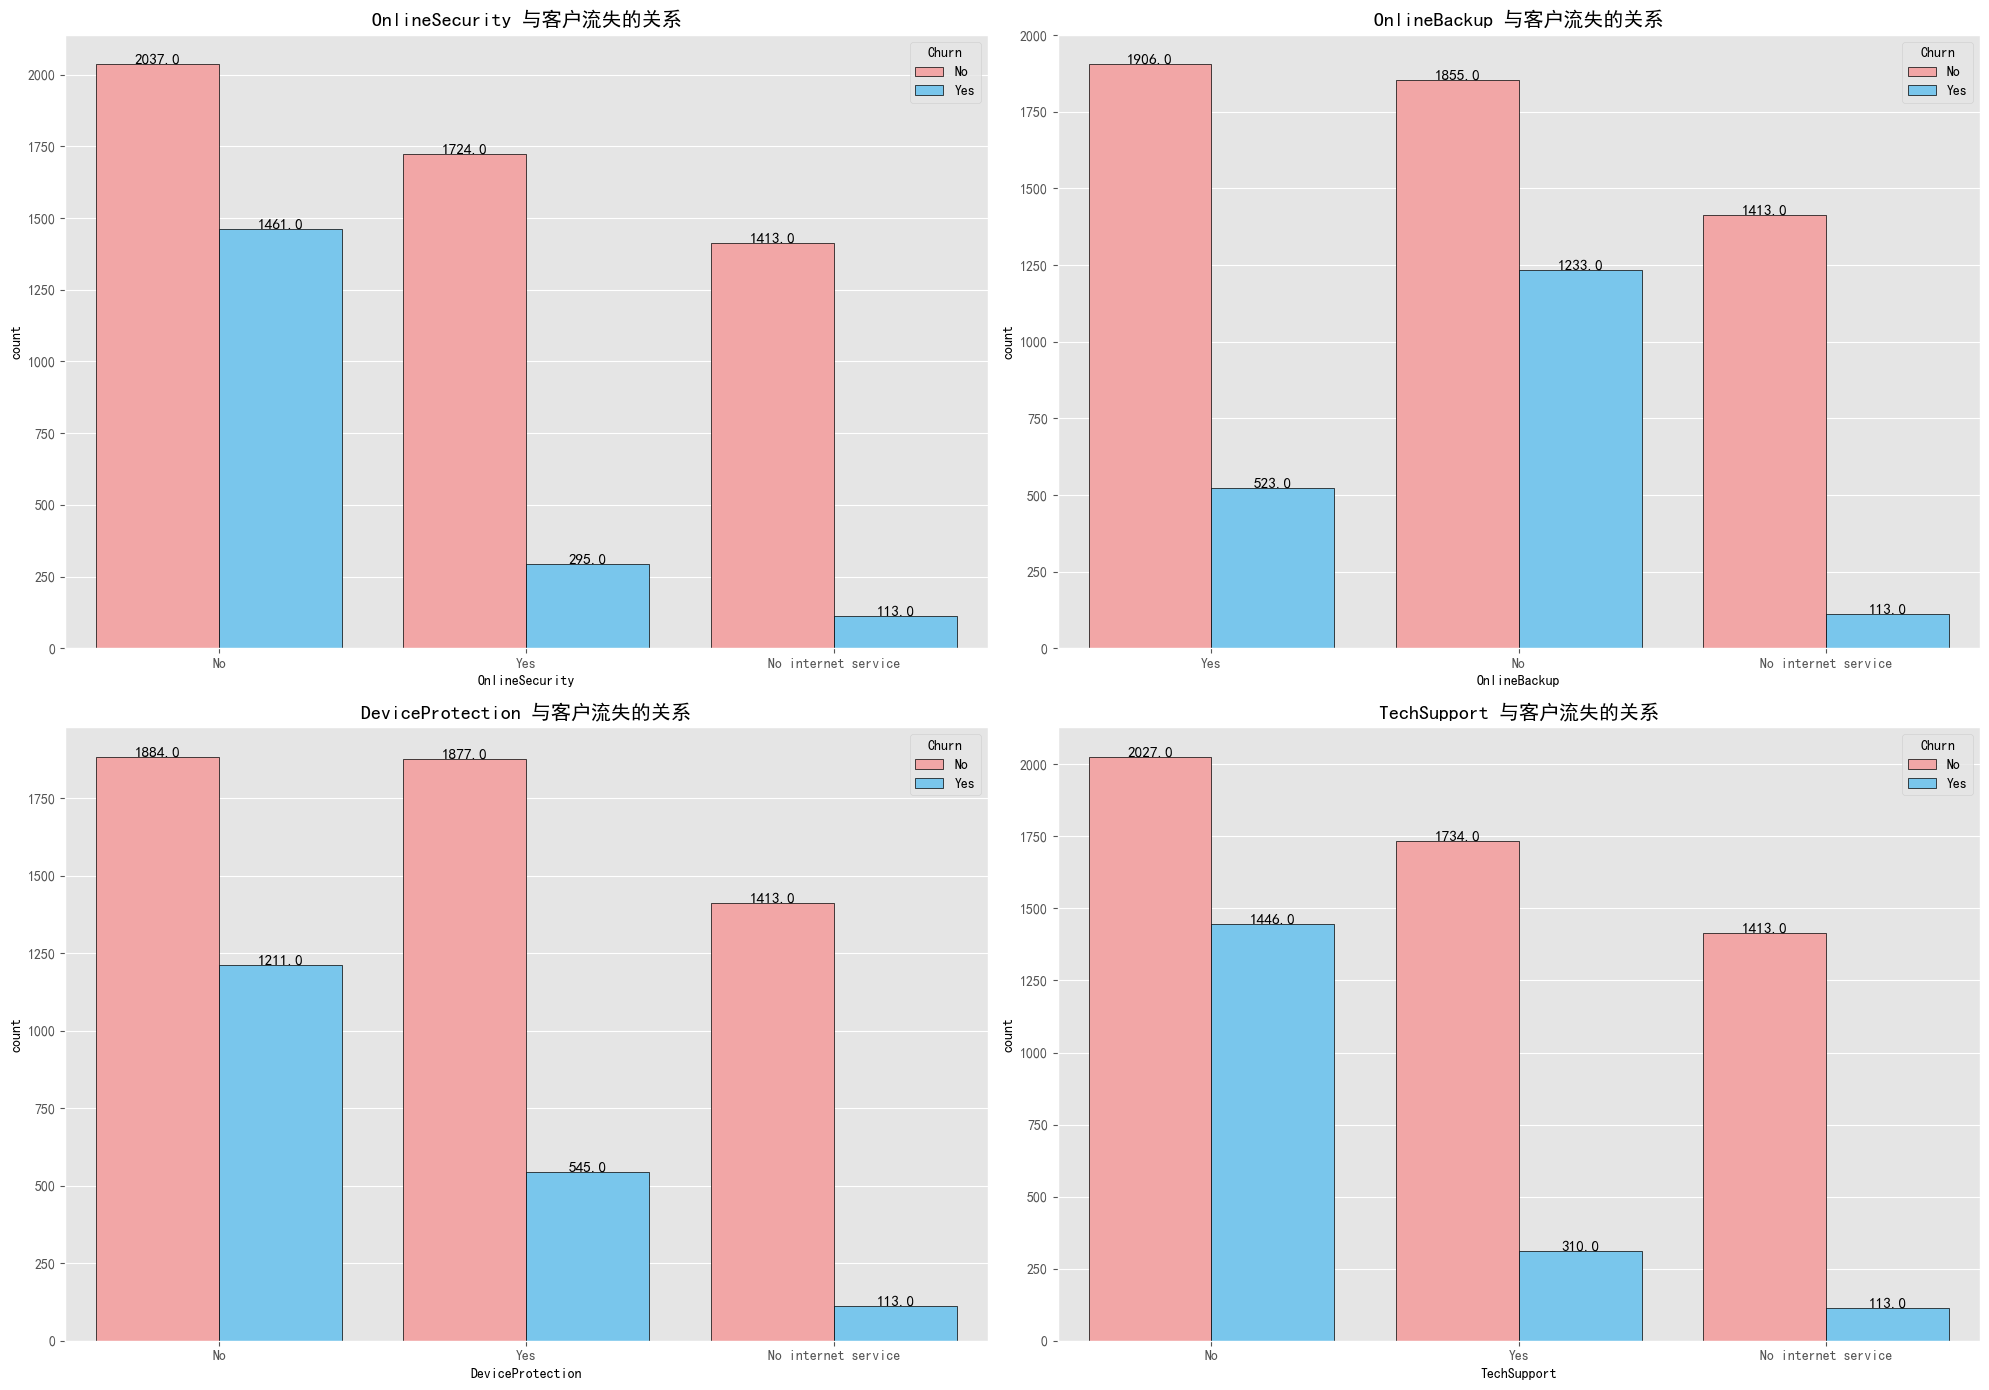

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))  # 创建一个2x2的图表布局
axs = axs.flatten()  # 将2x2的图表布局扁平化处理，以便于遍历

# 遍历特定特征，绘制与客户流失之间的关系图
for i, feature in enumerate(l2[-4:]):
    ax = sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black', ax=axs[i])
    ax.set_title(f'{feature} 与客户流失的关系')  # 为每个图表设置中文标题
    # 在每个柱状图的顶部添加数据标签
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, f'{height}', ha='center', fontsize=11)

plt.tight_layout()  # 自动调整子图参数，以给定的填充

根据上述可视化数据，当提供给客户的在线安全、在线备份、设备保护和技术支持等服务不佳时，大量客户选择更换服务提供商。这些服务对于留住客户至关重要。

## 分组3：支付信息

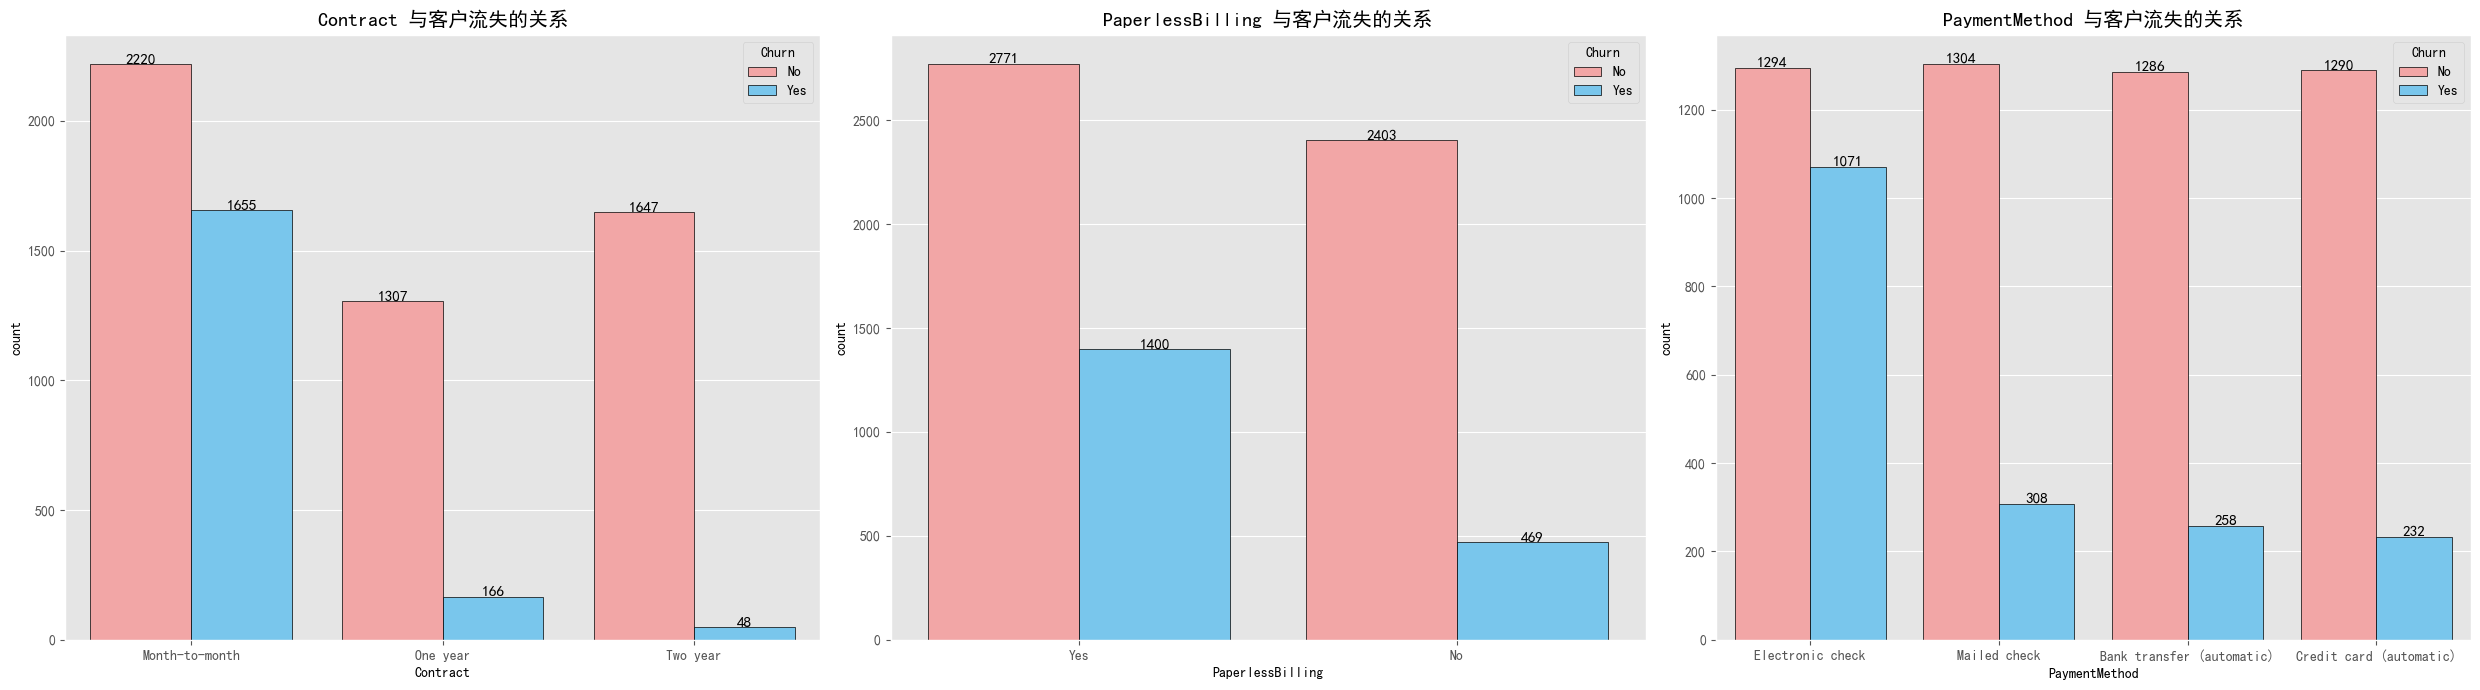

In [19]:
# 初始化画布和子图布局
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# 遍历特征，绘制与客户流失的关系图
for i, feature in enumerate(l3[:3]):
    ax = sns.countplot(x=feature, data=data, hue="Churn", palette=colors, edgecolor='black', ax=axs[i])  # 使用viridis颜色方案
    # 在每个柱状图的顶部标注数量
    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, int(height), ha='center', fontsize=11)
    # 设置每个子图的标题，增加中文支持
    axs[i].set_title(f'{feature} 与客户流失的关系')

plt.tight_layout()  # 调整布局以避免重叠

基于月对月合约的客户流失率相当高。这可能是因为客户在尝试可用的各种服务，因此为了节省费用，会测试1个月的服务！另一个原因可能是与互联网服务、流媒体服务和电话服务的整体体验不一致。每位客户的优先级不同，因此如果这三项服务中的任何一项达到标准，整个服务就会被取消！无纸化账单显示有大量客户被流失。这可能是由于某些支付问题或收据问题。客户显然对电子支票支付方式表示不满。在使用电子支票支付的2365份账单中，有高达1071名客户因为这种支付方式而退出了服务。公司显然需要放弃电子支票方法，或者使其无障碍且用户友好。

# 分类特征与正目标变量（流失案例）的关系分布（饼图）:

重点关注流失客户

## 分组1：客户信息

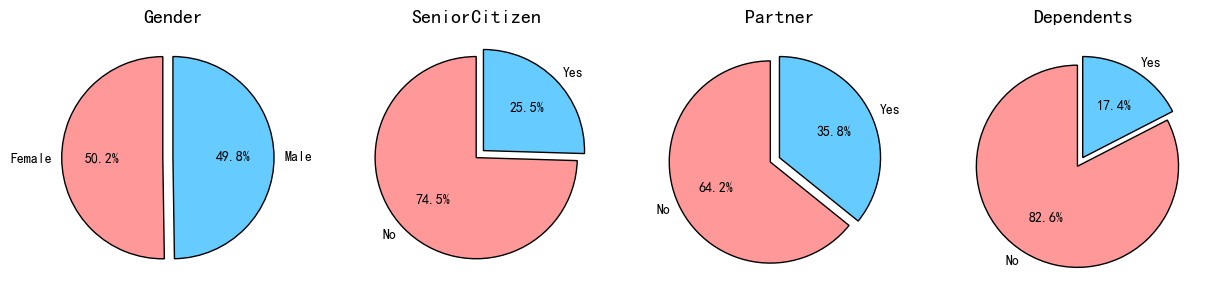

In [20]:
# 定义一个函数来计算并绘制饼图，减少重复代码
def calculate_and_plot_pie(data, column, labels, subplot_position, title, explode):
    counts = data[data['Churn'] == 1][column].value_counts(normalize=True) * 100
    ###
    data[data['Churn'] == 1]：这行代码从 data DataFrame 中选择那些 Churn 列值为1的行，即流失客户的数据。
    [column]：这行代码从上述筛选出的数据中选择 column 列的数据。
    .value_counts(normalize=True)：这行代码计算 column 列中不同值的数量，并将结果进行归一化处理。
    归一化意味着每个值的数量会转换为其在数据集中的比例。
    * 100：这行代码将归一化的结果乘以100，以得到百分比形式的比例。
    ###
    
    plt.subplot(1, 4, subplot_position)
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
    ###
    counts：这是饼图的数据，它是一个 Series 对象，包含了归一化后的值，表示每个部分在总体中的比例。
    wedgeprops：这是饼图边缘的属性，它是一个字典，包含了一系列的键值对，用于自定义饼图边缘的属性。
    'edgecolor': 'black'：这表示饼图边缘的颜色为黑色。
    'linewidth': 1：这表示饼图边缘的线宽为1像素。
    'antialiased': True：这表示饼图边缘是平滑的，没有锯齿。
        
    %：表示格式化的开始。
    1：这个数字指定了小数点左边（即整数部分）至少需要显示的数字的宽度。
    如果数字的整数部分少于这个宽度，它将不会被填充或调整宽度。
    .：这是一个字面意义上的点，用于分隔整数部分和小数部分。
    1：这个数字指定了小数点右边（即小数部分）需要显示的数字的位数。
    f：表示浮点数格式。
    %%：在格式化字符串中，为了显示一个百分号（%），需要使用两个百分号（%%）。
    
    ###
    plt.title(title)

# 使用上述函数来绘制所有需要的饼图
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))

calculate_and_plot_pie(df1, 'gender', ['Female', 'Male'], 1, 'Gender', (0.1, 0))
calculate_and_plot_pie(df1, 'SeniorCitizen', ['No', 'Yes'], 2, 'SeniorCitizen', (0, 0.1))
calculate_and_plot_pie(df1, 'Partner', ['No', 'Yes'], 3, 'Partner', (0.1, 0))
calculate_and_plot_pie(df1, 'Dependents', ['No', 'Yes'], 4, 'Dependents', (0.1, 0))


我们可以清楚地观察到，选择更换服务的男性和女性客户之间存在着50%对50%的均等分割。因此，转换的原因与服务或某些流程有关，客户对此反应不佳！
75%的流失客户不是高龄人士！这是公司需要转移其注意力的重要信息！
独居的客户已经切断了服务。从伴侣和家属依赖的数据来看，平均有73.4%的流失客户是独居的。

## 分组2：客户签订的服务

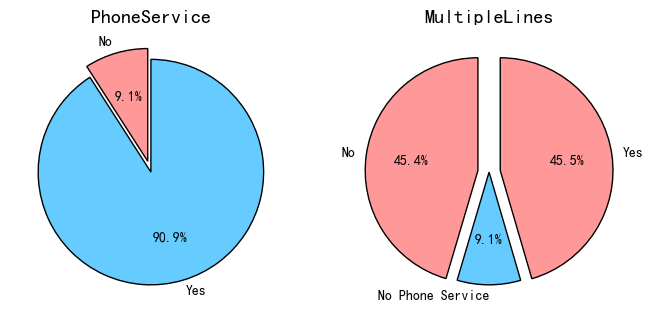

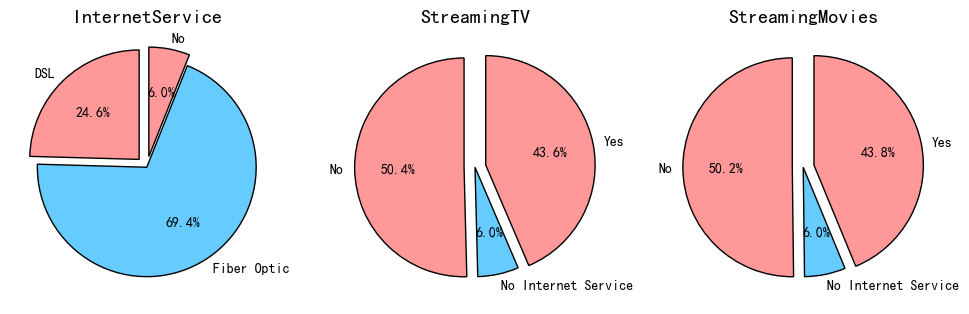

In [21]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

尽管提供了电话服务，但仍有很高比例的客户选择了转换服务！
同样，多线路的可用性并没有起到作用，因为客户取消订阅的行为仍然发生！
客户显然不喜欢使用光纤电缆提供互联网服务的方式，有高达70%的客户选择退出服务！
对于流媒体电视和流媒体电影，没有这些服务的客户肯定取消了他们的订阅，然而，平均有43.8%的客户在享受流媒体内容的同时还是选择了转换服务。

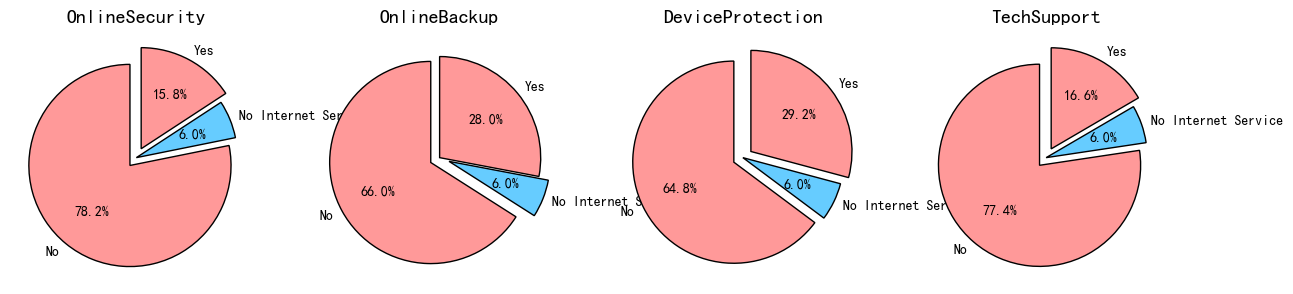

In [22]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

上述饼图强调了提供在线安全、在线备份、设备保护和技术支持的重要性，因为平均有71.6%的客户因缺乏这些功能而中断了他们的服务！

## 分组3：支付

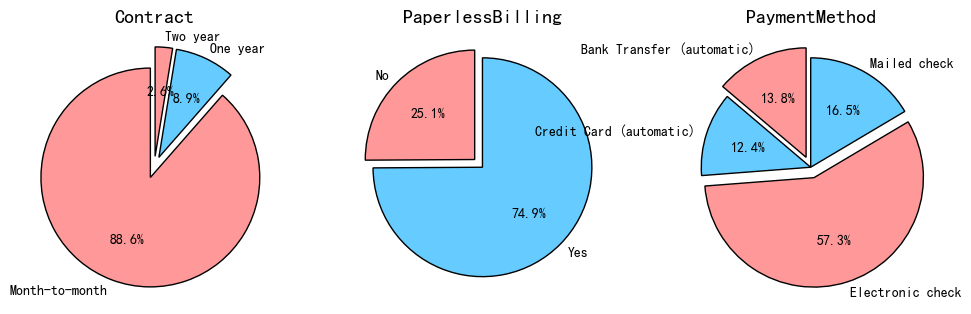

In [23]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

月对月的合约期限在客户流失时占据了主导地位，高达88.6%的客户选择了离开！
客户似乎不太喜欢无纸化账单！
电子支票绝对需要得到解决，因为它占到了57.3%的客户流失。其次是邮寄支票、银行转账（自动）和信用卡（自动）。

# 数值特征与正目标变量（流失案例）的关系分布:

## 数值特征概况

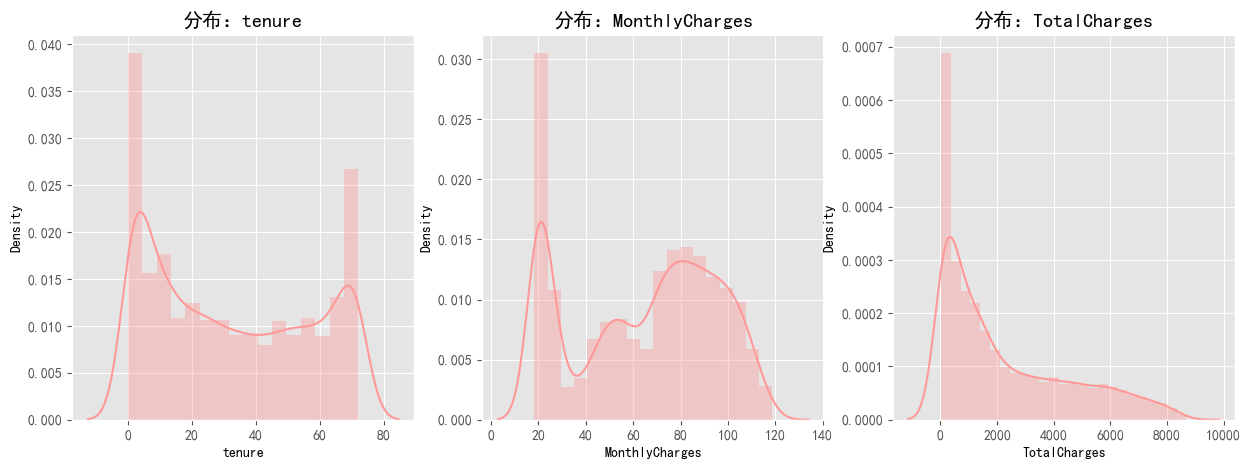

In [24]:
# 设置图形大小和子图布局
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# 遍历数值特征，为每个特征绘制分布图
for i, feature in enumerate(numerical_features):
    # 选择子图位置
    plt.subplot(1, 3, i + 1)
    # 绘制特征的分布图，使用指定的颜色
    sns.distplot(df1[feature], color=colors[0])
    # 设置图形标题，展示特征名称
    plt.title(f'分布：{feature}')

# 显示图形
plt.show()


“tenure”和“MonthlyCharges”形成了一种双峰分布，其峰值分别位于0-70和20-80。
“TotalCharges”显示出一种正向或右偏的分布。

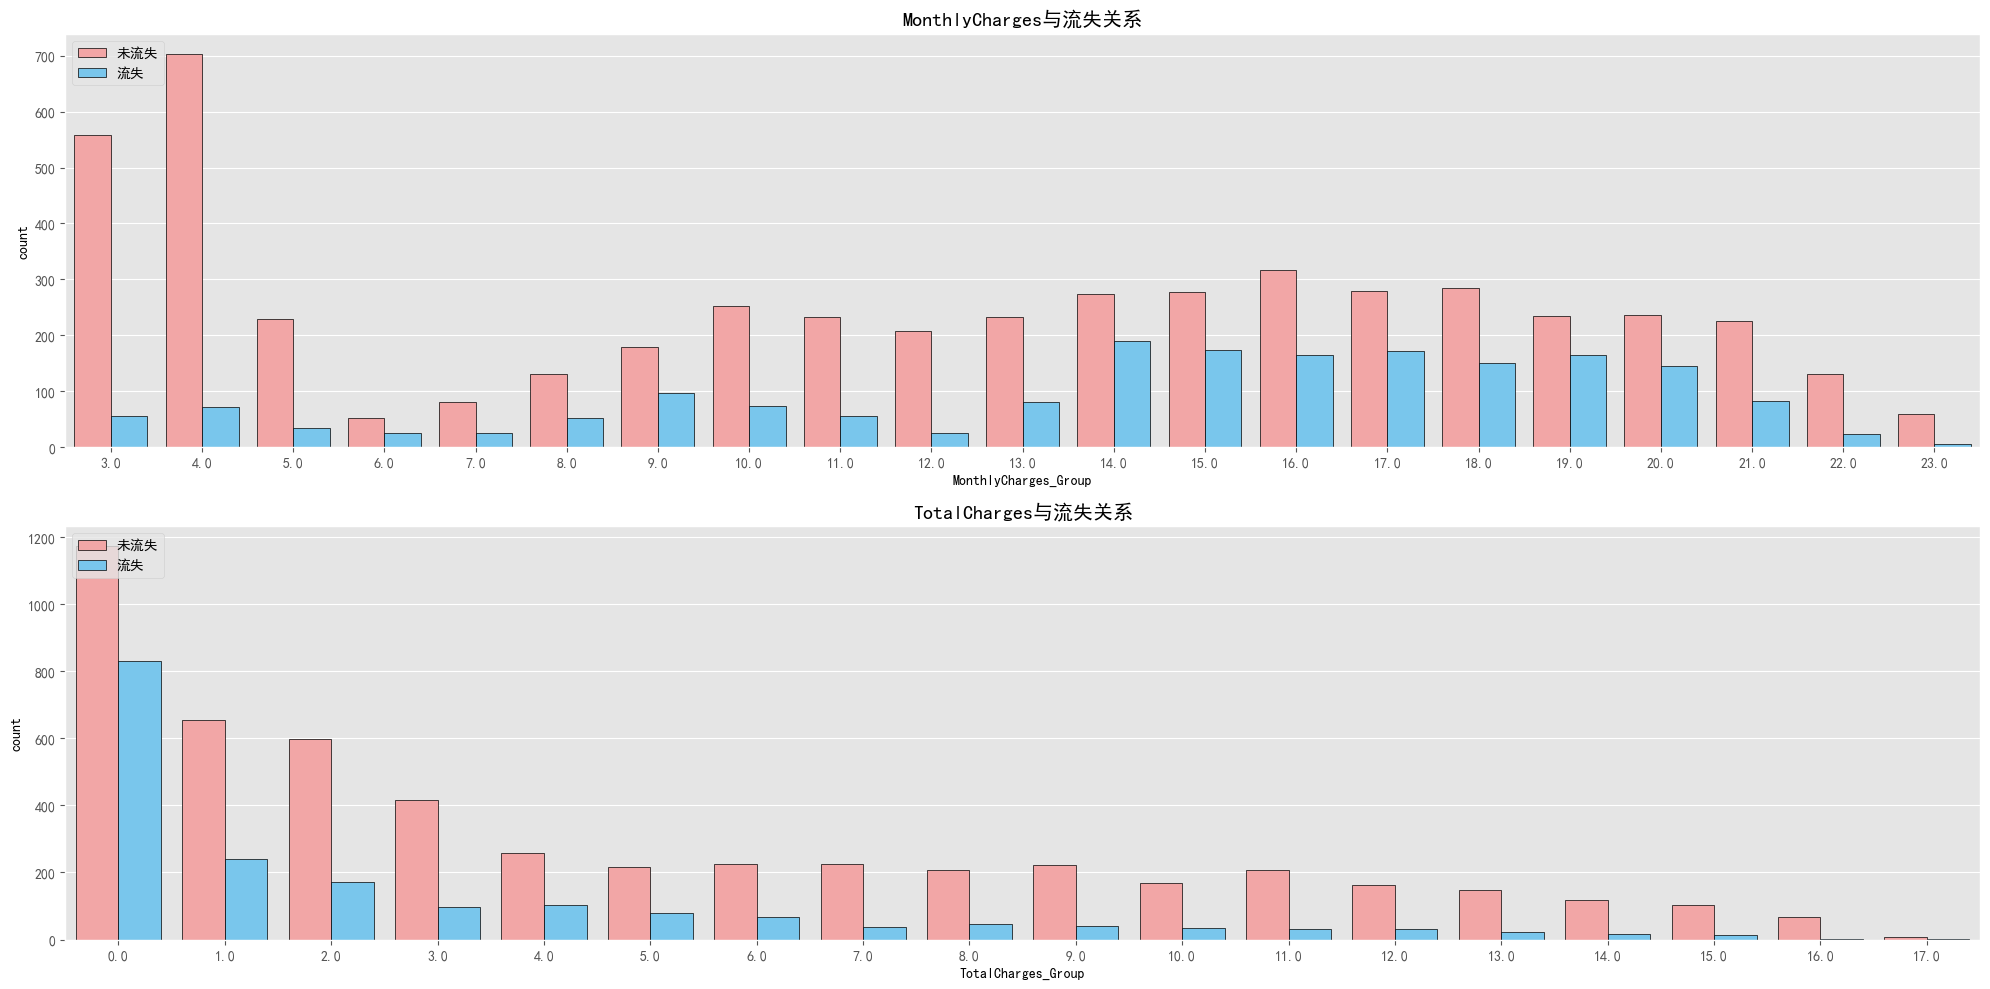

In [25]:
# 为月费用和总费用分别创建分组列
df1['MonthlyCharges_Group'] = df1['MonthlyCharges'] // 5
###
这行代码将MonthlyCharges列中的每个值除以5，然后向下取整，创建一个新的分组列MonthlyCharges_Group。
###
df1['TotalCharges_Group'] = df1['TotalCharges'] // 500

# 设置绘图区域大小
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# 遍历除第一个数值特征以外的其它特征（这里假设你想排除第一个数值特征）
for i, feature in enumerate(numerical_features[1:]):
    # 选择子图
    plt.subplot(2, 1, i + 1)
    # 绘制分组柱状图，明确指定x列名和颜色，根据是否流失进行分色
    sns.countplot(x=f'{feature}_Group', data=df1, hue='Churn', palette=colors, edgecolor='black')
    # 设置图例位置
    plt.legend(['未流失', '流失'], loc='upper left')
    # 设置标题
    plt.title(f'{feature}与流失关系');

# 显示绘图
plt.tight_layout()
plt.show()


对于月费组来说，当月费在65（13x5）到105（21x5）之间时，流失率较高。这个月费范围导致客户转换。

对于总费用在500以下的客户来说，选择退出服务的人数非常多。这种客户流失情况持续存在于总费用范围从0（0x500）到1000（2x500）之间。

# 针对目标变量（Churn），分析数值特征与类别特征的关系（箱型图）

## tenure与类别特征的关系

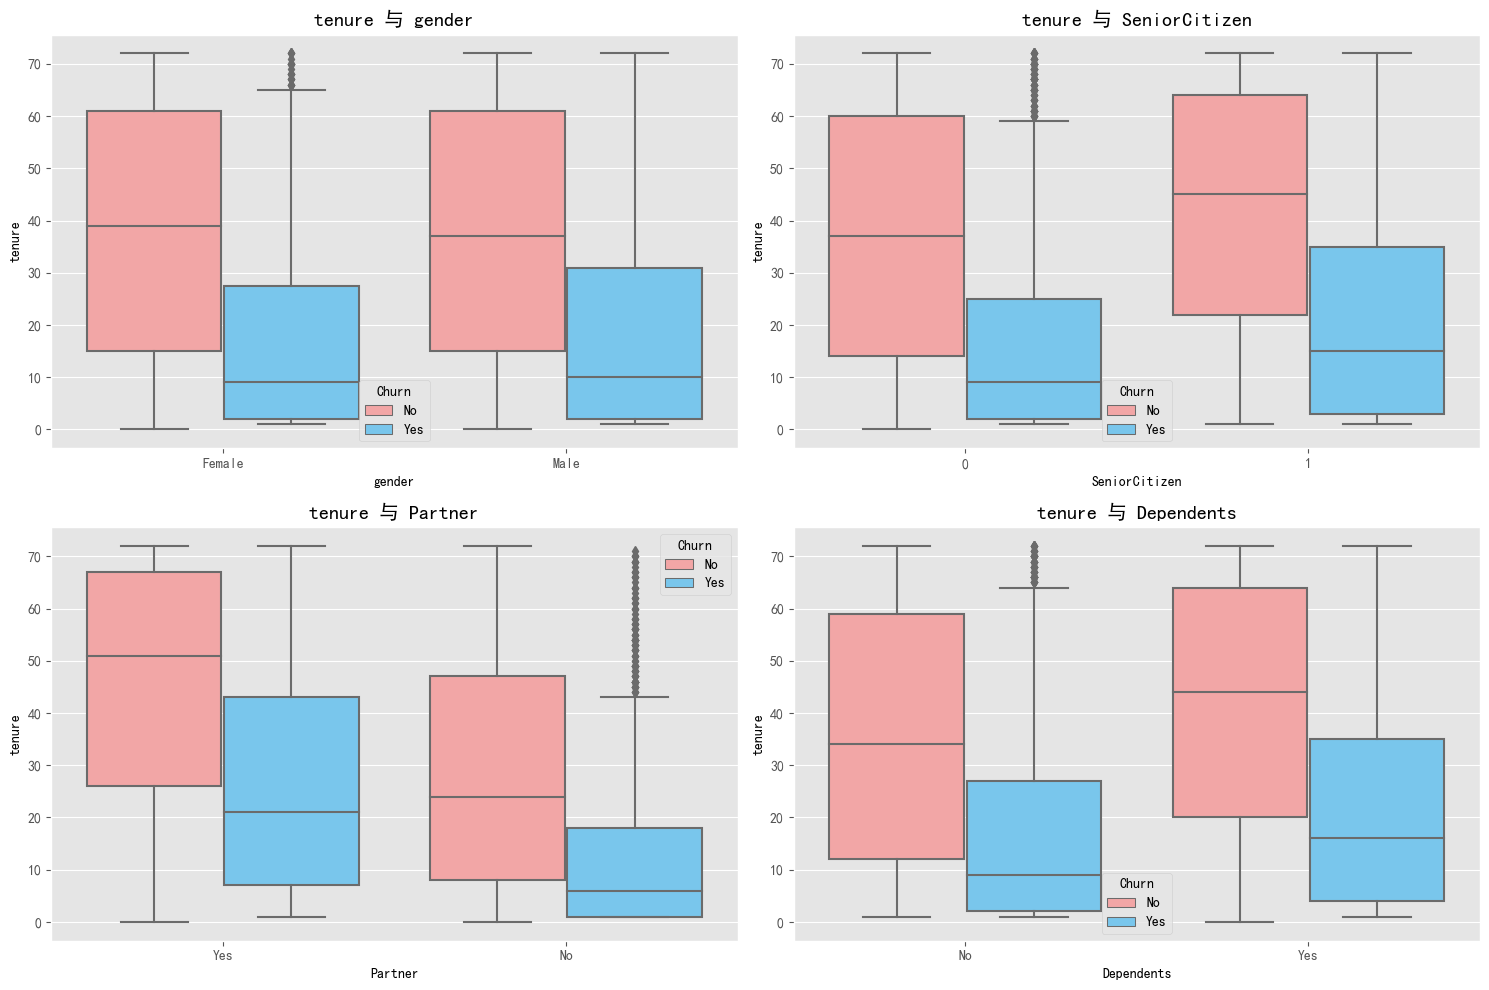

In [26]:
# 初始化绘制2行2列的子图，设置总体图形大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 遍历l1列表中的每个元素，绘制箱线图
for i, feature in enumerate(l1):
    # 选择子图位置
    ax = plt.subplot(2, 2, i + 1)
    # 绘制箱线图，对比tenure与l1列表中的特征，按照Churn进行分组
    sns.boxplot(x=feature, y='tenure', data=data, hue='Churn', palette=colors)
    # 设置图形标题
    plt.title(f'tenure 与 {feature}')

# 显示图形
plt.tight_layout()
plt.show()


男性和女性客户的流失图非常相似。
资深公民在服务的前0至35个月内选择了退出。20至35个月是资深公民决定是否继续或切换服务的决策期。
同样地，有伴侣的客户在5至45个月内继续使用服务。

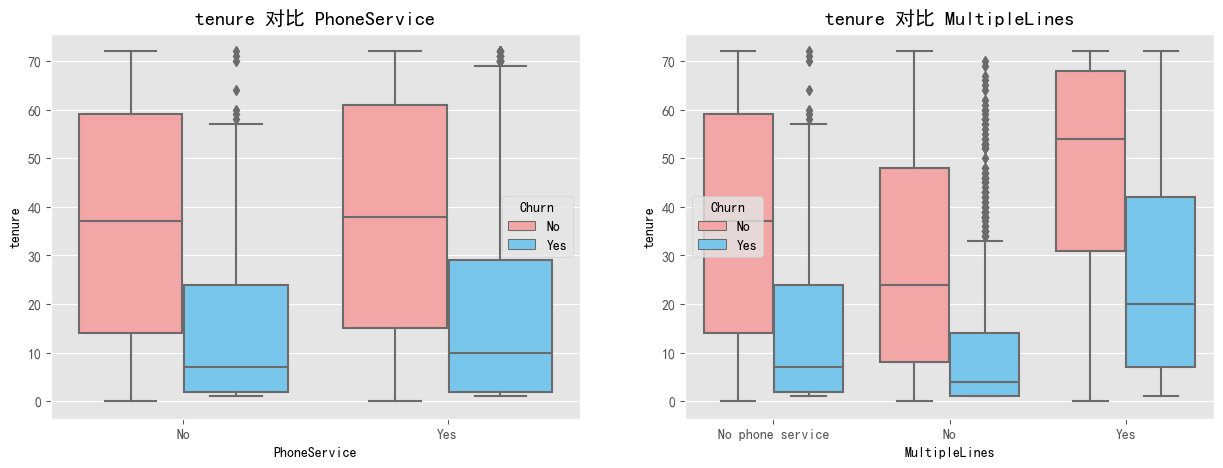

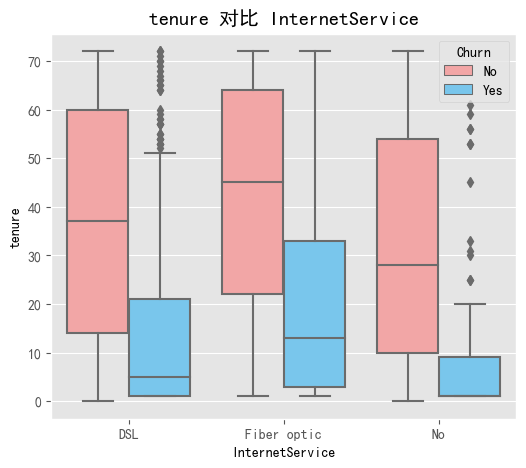

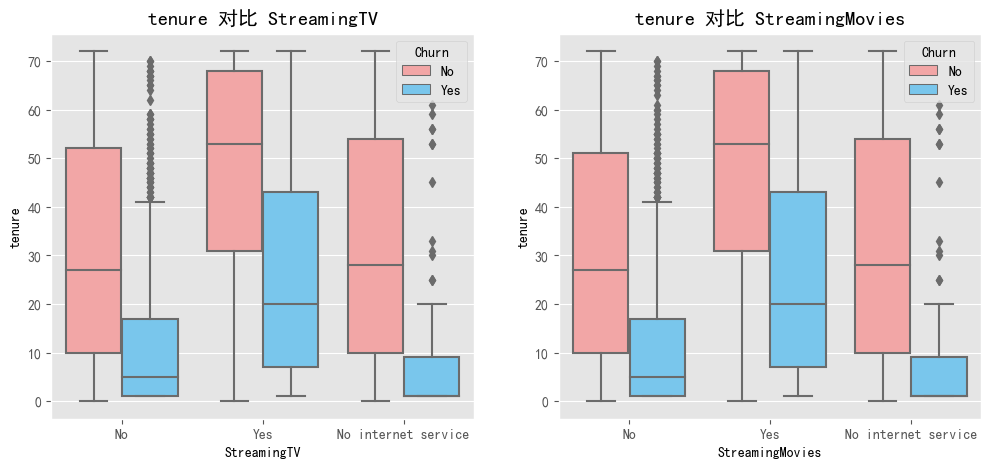

In [27]:
# 初始化一个1行2列的图形布局，用于前两个特征的箱线图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 对l2列表的前两个元素绘制箱线图
for i in range(2):
    ax = axes[i]
    sns.boxplot(x=l2[i], y='tenure', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'tenure 对比 {l2[i]}')

# 单独为第三个特征创建图形
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
sns.boxplot(x=l2[2], y='tenure', data=data, hue='Churn', palette=colors, ax=ax)
ax.set_title(f'tenure 对比 {l2[2]}')

# 初始化一个1行2列的图形布局，用于最后两个特征的箱线图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 对l2列表的最后两个元素绘制箱线图
for i in range(2):
    ax = axes[i]
    sns.boxplot(x=l2[i + 3], y='tenure', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'tenure 对比 {l2[i + 3]}')


无论客户是否选择退出服务，多线路服务的存在都会推高月费的中位数。
在服务年限与电话服务的图表中，是否有电话服务的情况显示出镜像般的视觉效果。客户可能不是重度电话（通话 - 短信）使用者。
对于互联网服务，客户似乎对光纤缆的使用持非常怀疑态度，因为流失期持续了大约30至35个月，之后才决定是继续使用还是换新的！
类似地，对于流媒体电视和流媒体电影，可以观察到大约10至40个月的流失期！

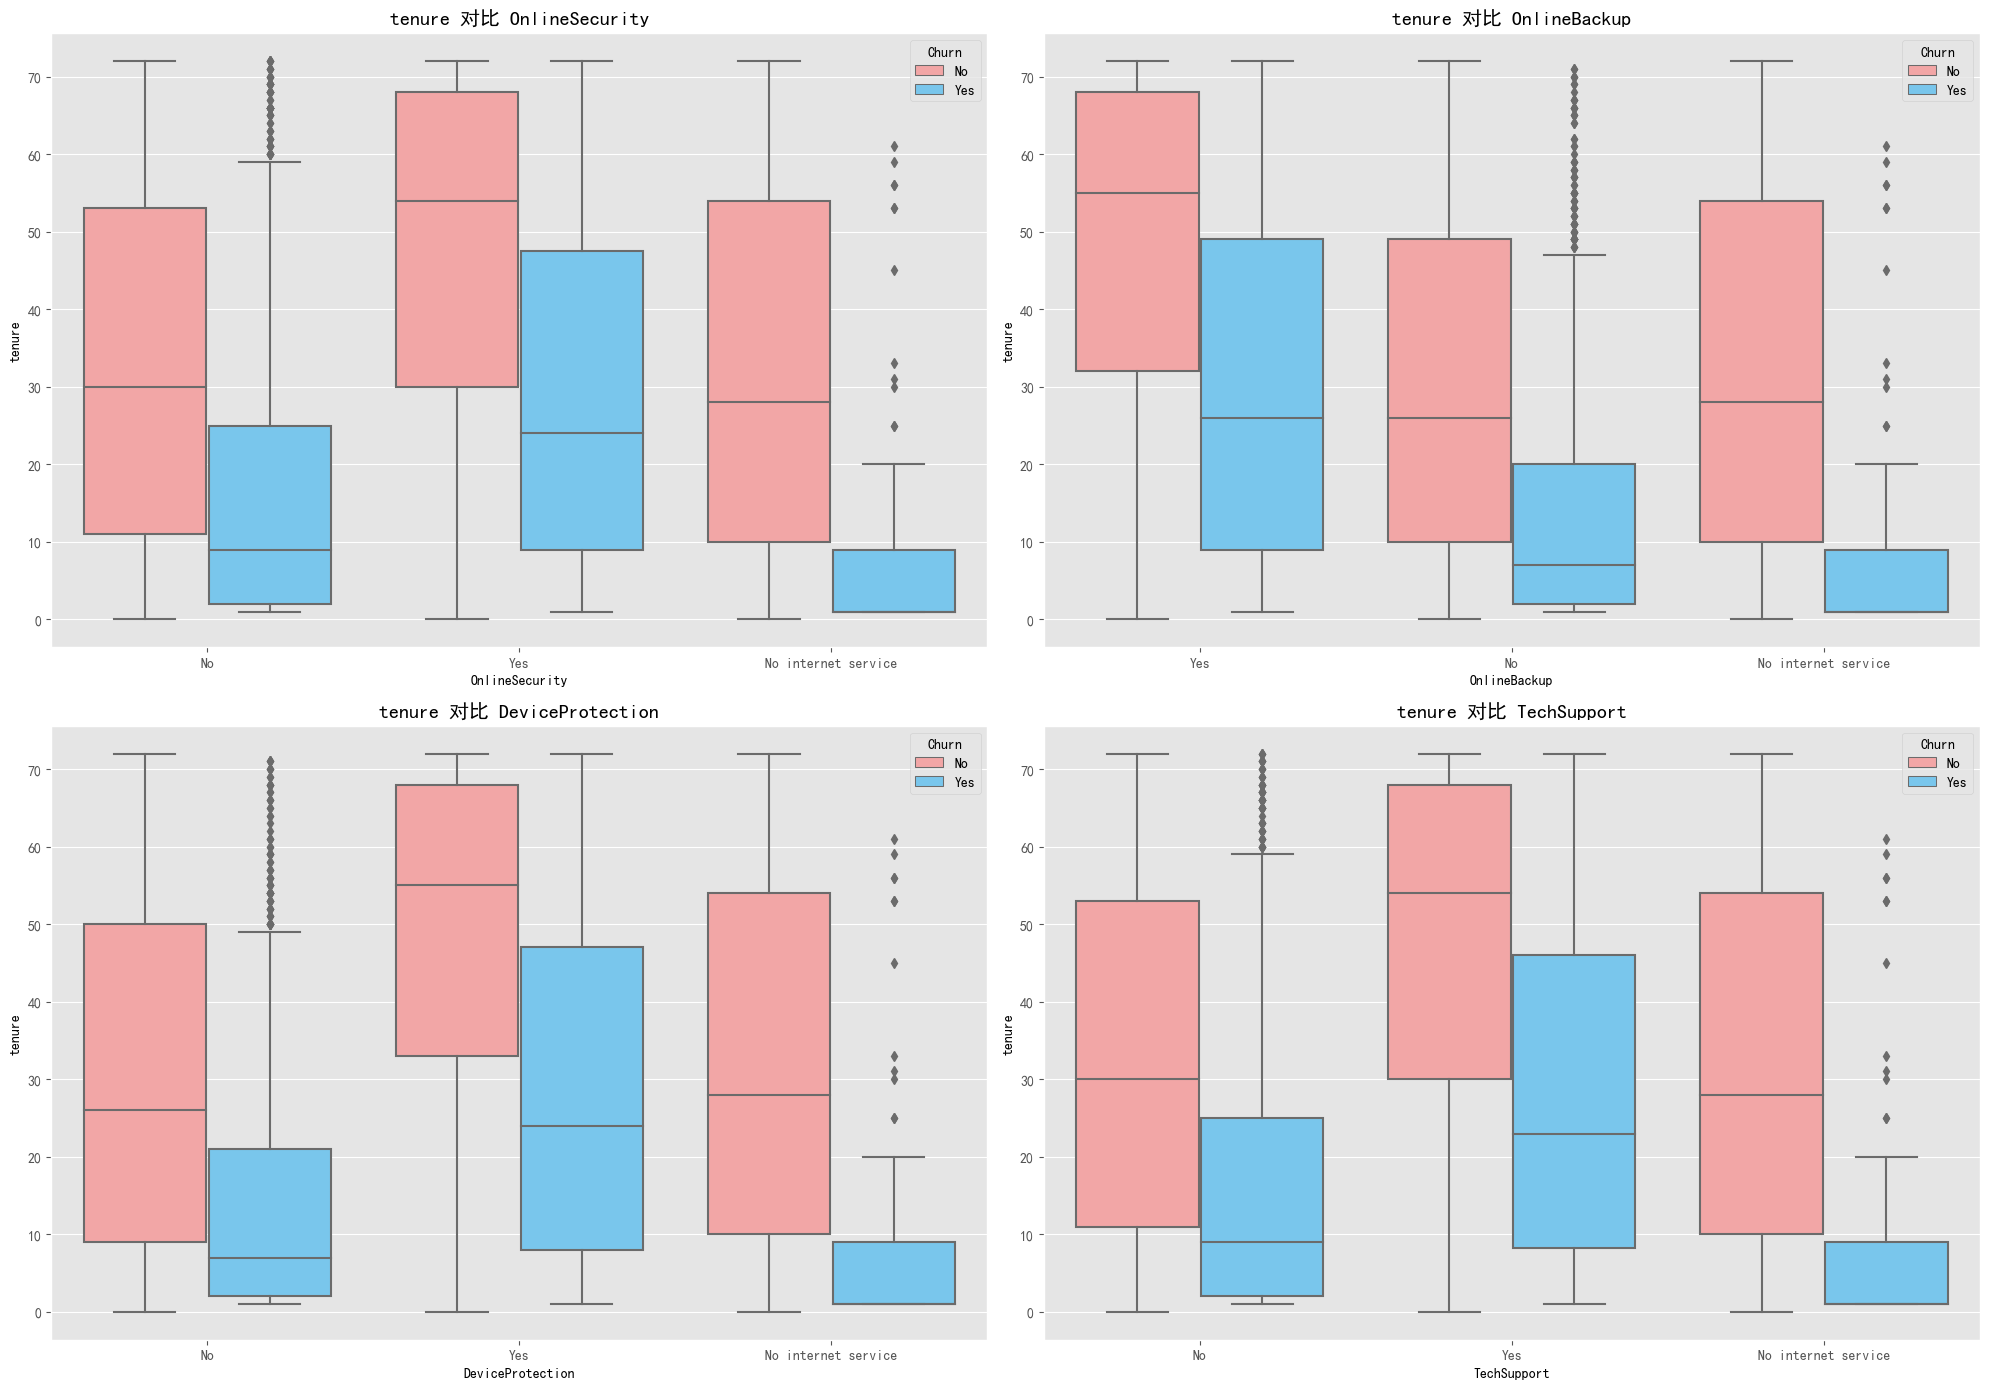

In [28]:
# 初始化2行2列的图形布局，设置图形大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# 遍历l2列表的最后四个元素，并在相应的子图上绘制箱线图
for i, feature in enumerate(l2[-4:]):
    ax = axes[i // 2, i % 2]  # 确定子图的位置，i//2即除以2取整，i%2即取除以2的余数
    sns.boxplot(x=feature, y='tenure', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'tenure 对比 {feature}')

# 调整布局，防止标题和标签重叠
plt.tight_layout()


对于在线安全、在线备份、设备保护和技术支持，中位数流失期限值为25个月。这种流失期限的最高值约为45个月。
30至35个月的期限是客户决定是否继续当前服务或针对上述特性进行切换的时间点！

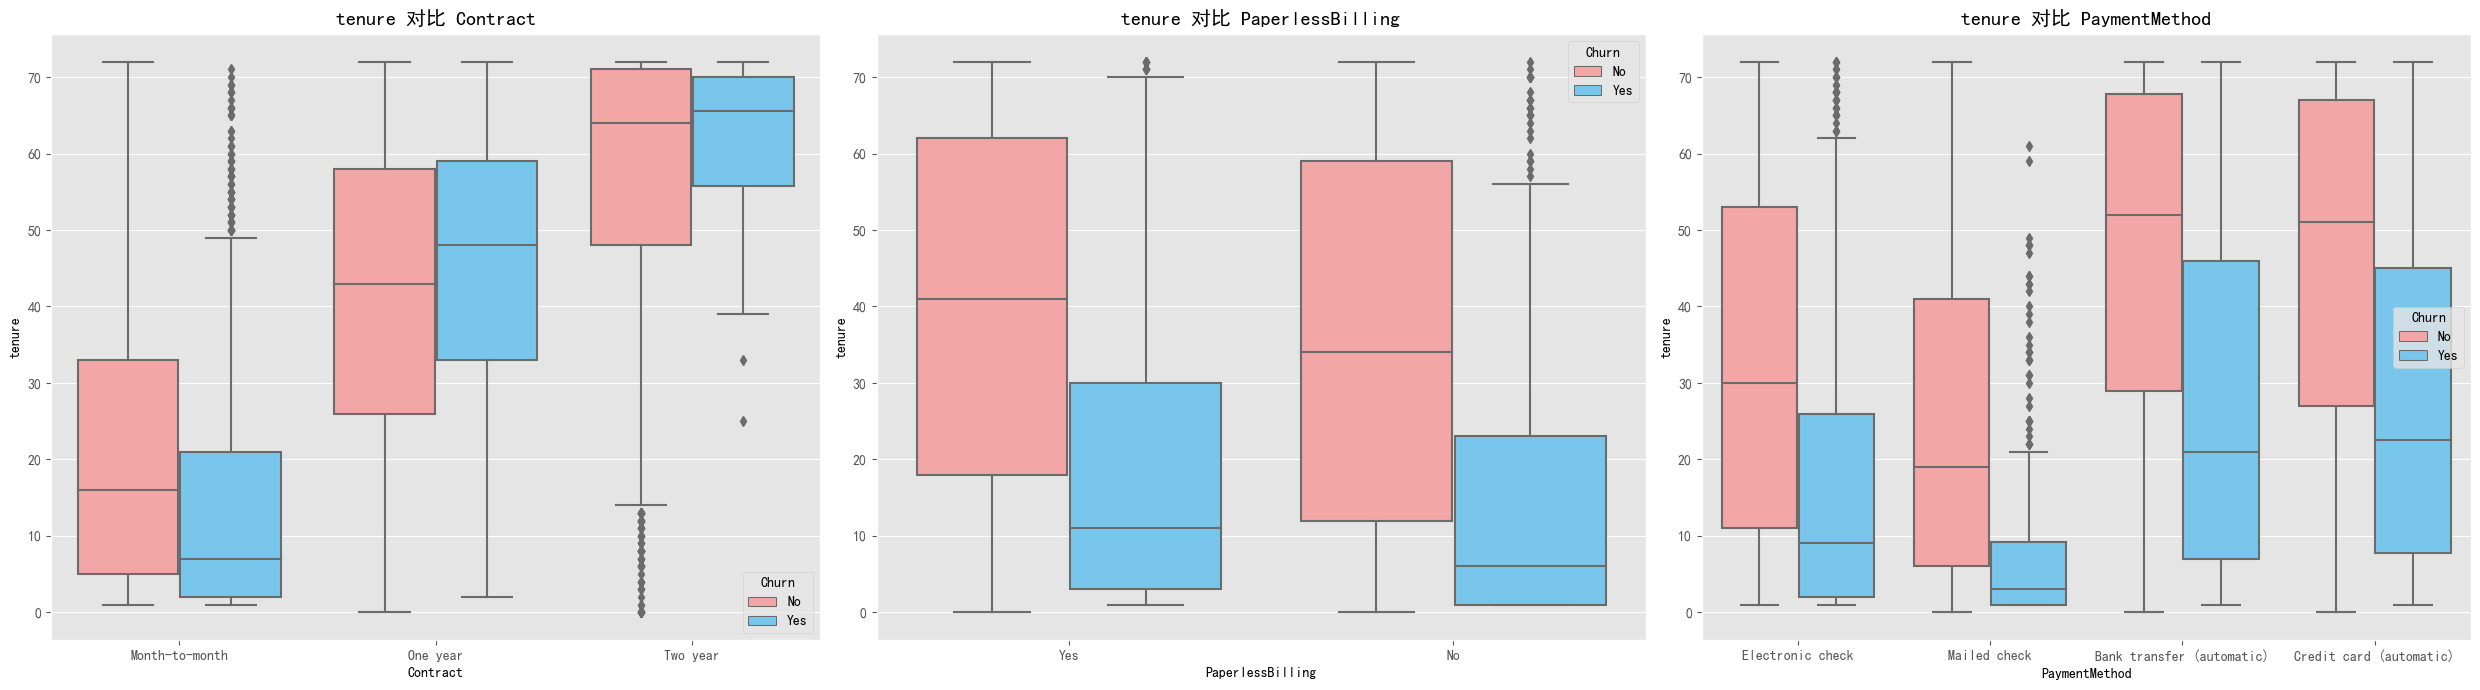

In [29]:
# 初始化1行3列的图形布局，设置图形大小
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# 遍历l3列表，并在相应的子图上绘制箱线图
for i, feature in enumerate(l3):
    ax = axes[i]  # 直接从axes数组中获取对应的子图对象
    sns.boxplot(x=feature, y='tenure', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'tenure 对比 {feature}')  # 使用中文输出标题

# 调整布局，防止标题和标签重叠
plt.tight_layout()


当客户签订一年和两年的服务合约时，他们似乎分别会继续使用服务大约25个月和45个月！然而，他们分别从第35个月和第55个月开始质疑服务，并考虑切换。
无论是否采用无纸化账单，客户从第一个月开始就考虑切换。
在支付方式上，银行转账（自动）和信用卡（自动）的中位数流失期限超过20个月，几乎是电子支票和邮寄支票的两倍，分别约为10个月和约5个月。

## MouthlyCharges和类别特征的关系

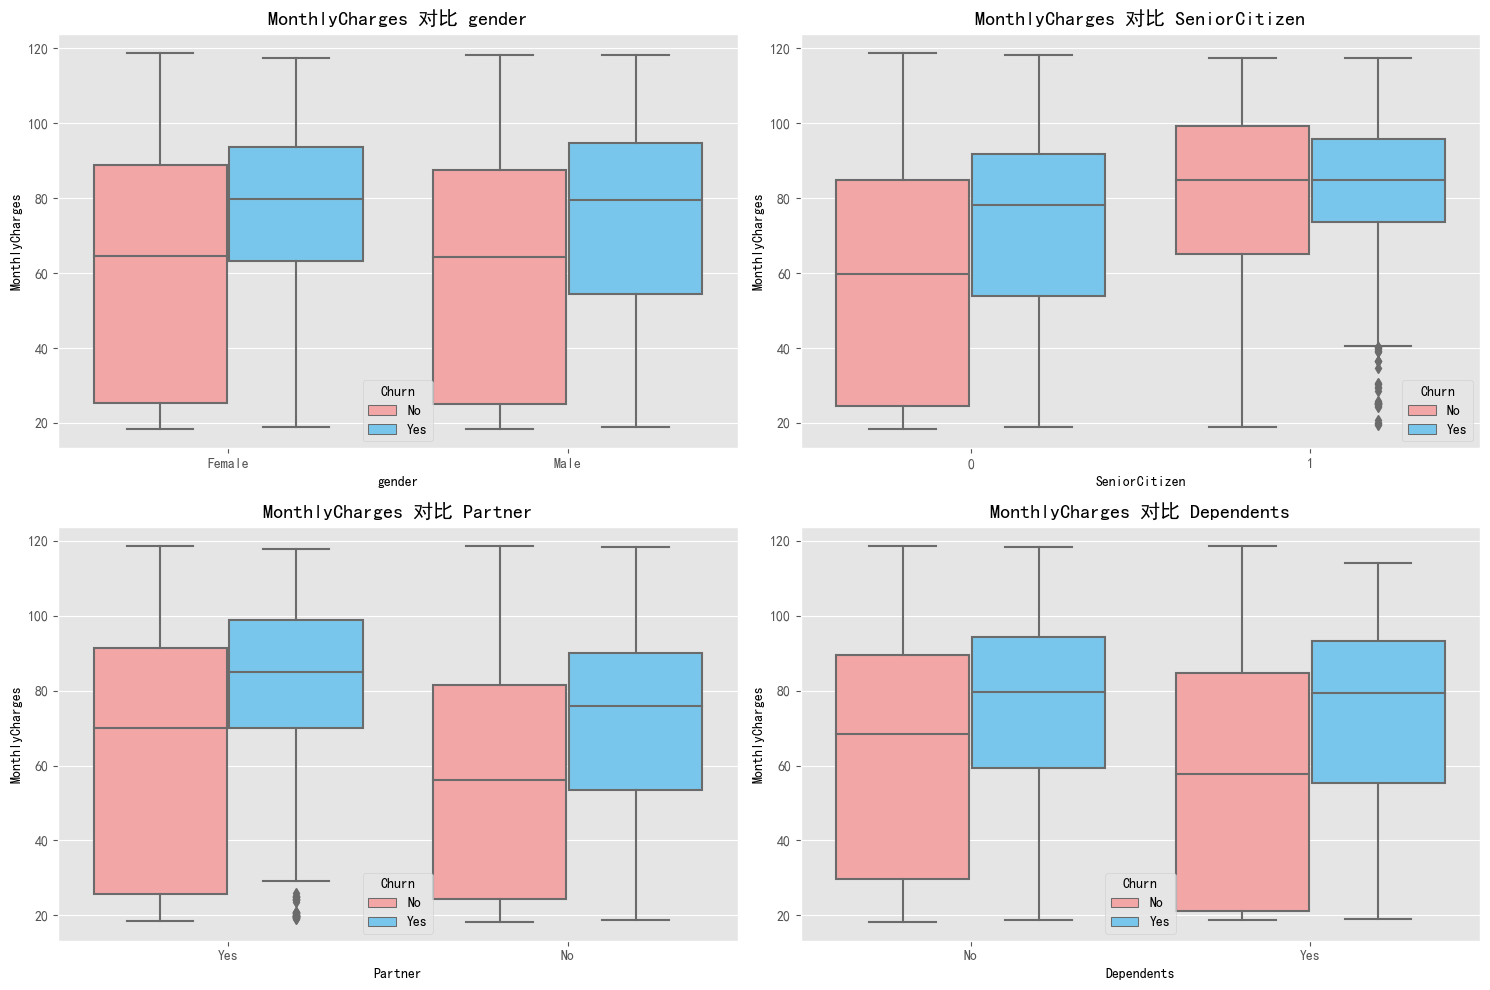

In [30]:
# 初始化2行2列的图形布局，设置图形大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 遍历l1列表的前四个元素，并在相应的子图上绘制箱线图
for i, feature in enumerate(l1[:4]):
    ax = axes[i // 2, i % 2]  # 计算子图的位置
    sns.boxplot(x=feature, y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'MonthlyCharges 对比 {feature}')  # 使用中文输出标题

# 调整布局，防止标题和标签重叠
plt.tight_layout()


对于上述所有特性，未流失客户的中位数值非常接近流失客户的下限值。
男性和女性客户的平均每月费用中位数约为60。对于高龄公民，这个值提高到了80。
与伴侣同居的客户比独居的客户有更高的流失下限值，其每月费用为70，而独居者的每月费用仅略低于60！

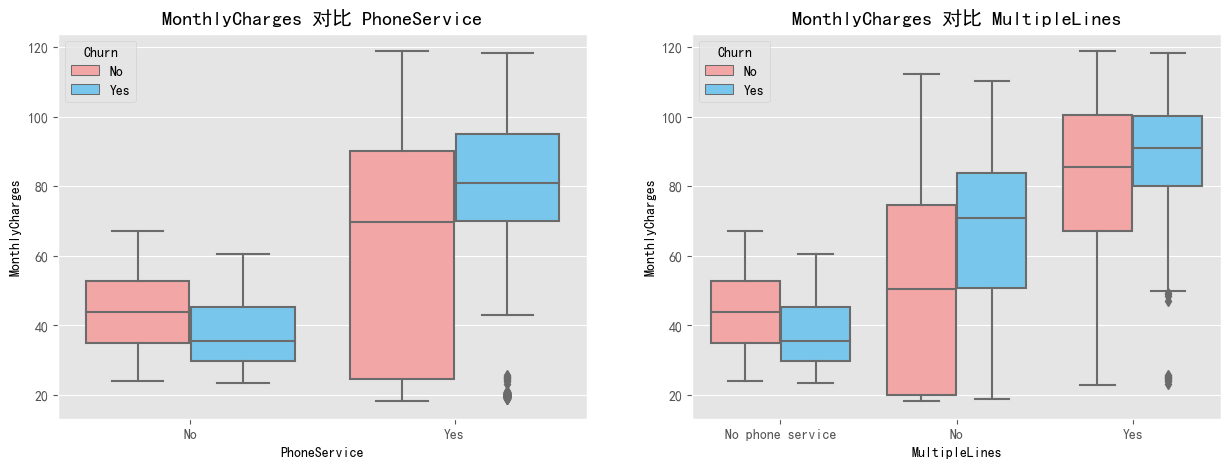

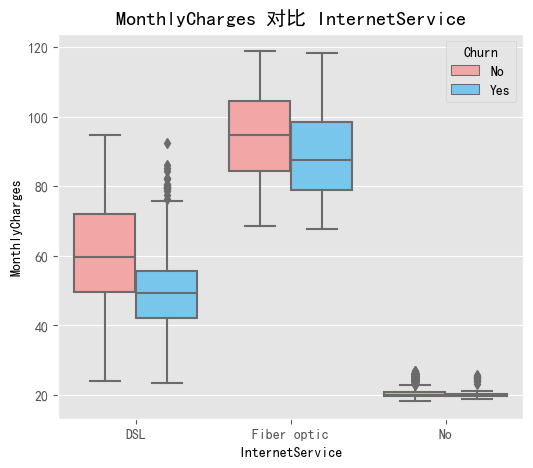

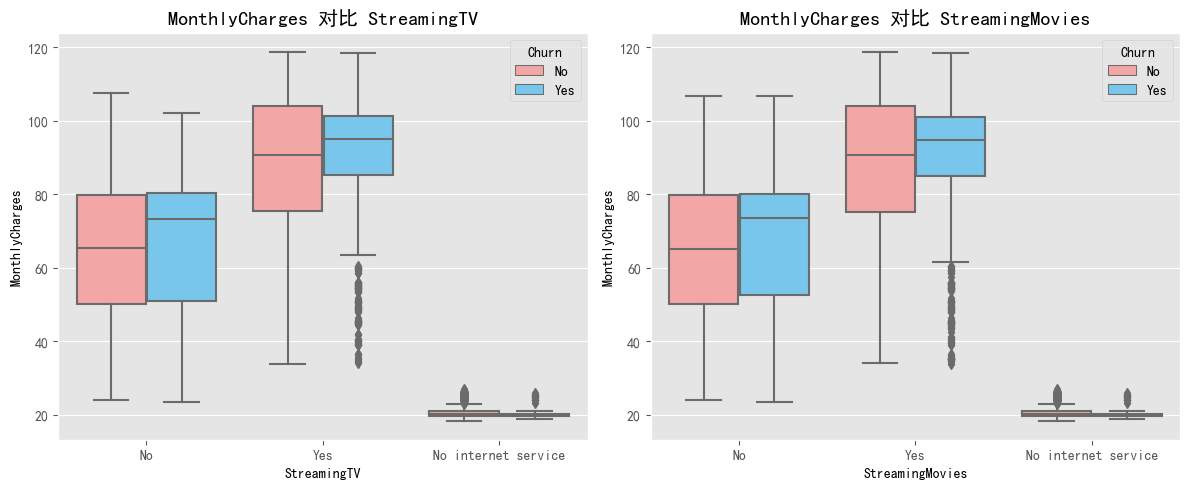

In [31]:
# 第一部分：1行2列的布局
fig, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for i, feature in enumerate(l2[:2]):
    sns.boxplot(x=feature, y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=axes1[i])
    axes1[i].set_title(f'MonthlyCharges 对比 {feature}')

# 第二部分：1行1列的布局
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
sns.boxplot(x=l2[2], y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=ax2)
ax2.set_title(f'MonthlyCharges 对比 {l2[2]}')

# 第三部分：1行2列的布局
fig, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, feature in enumerate(l2[3:5]):
    sns.boxplot(x=feature, y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=axes3[i])
    axes3[i].set_title(f'MonthlyCharges 对比 {feature}')

# 为所有图形调整布局
plt.tight_layout()


光纤光缆的每月费用非常高。因此，这可能是客户流失率如此高的原因。
同样，流媒体电视和流媒体电影的每月费用也相当高。
电话服务的每月费用范围是从25到85，但客户在每月费用达到75时就考虑取消订阅。

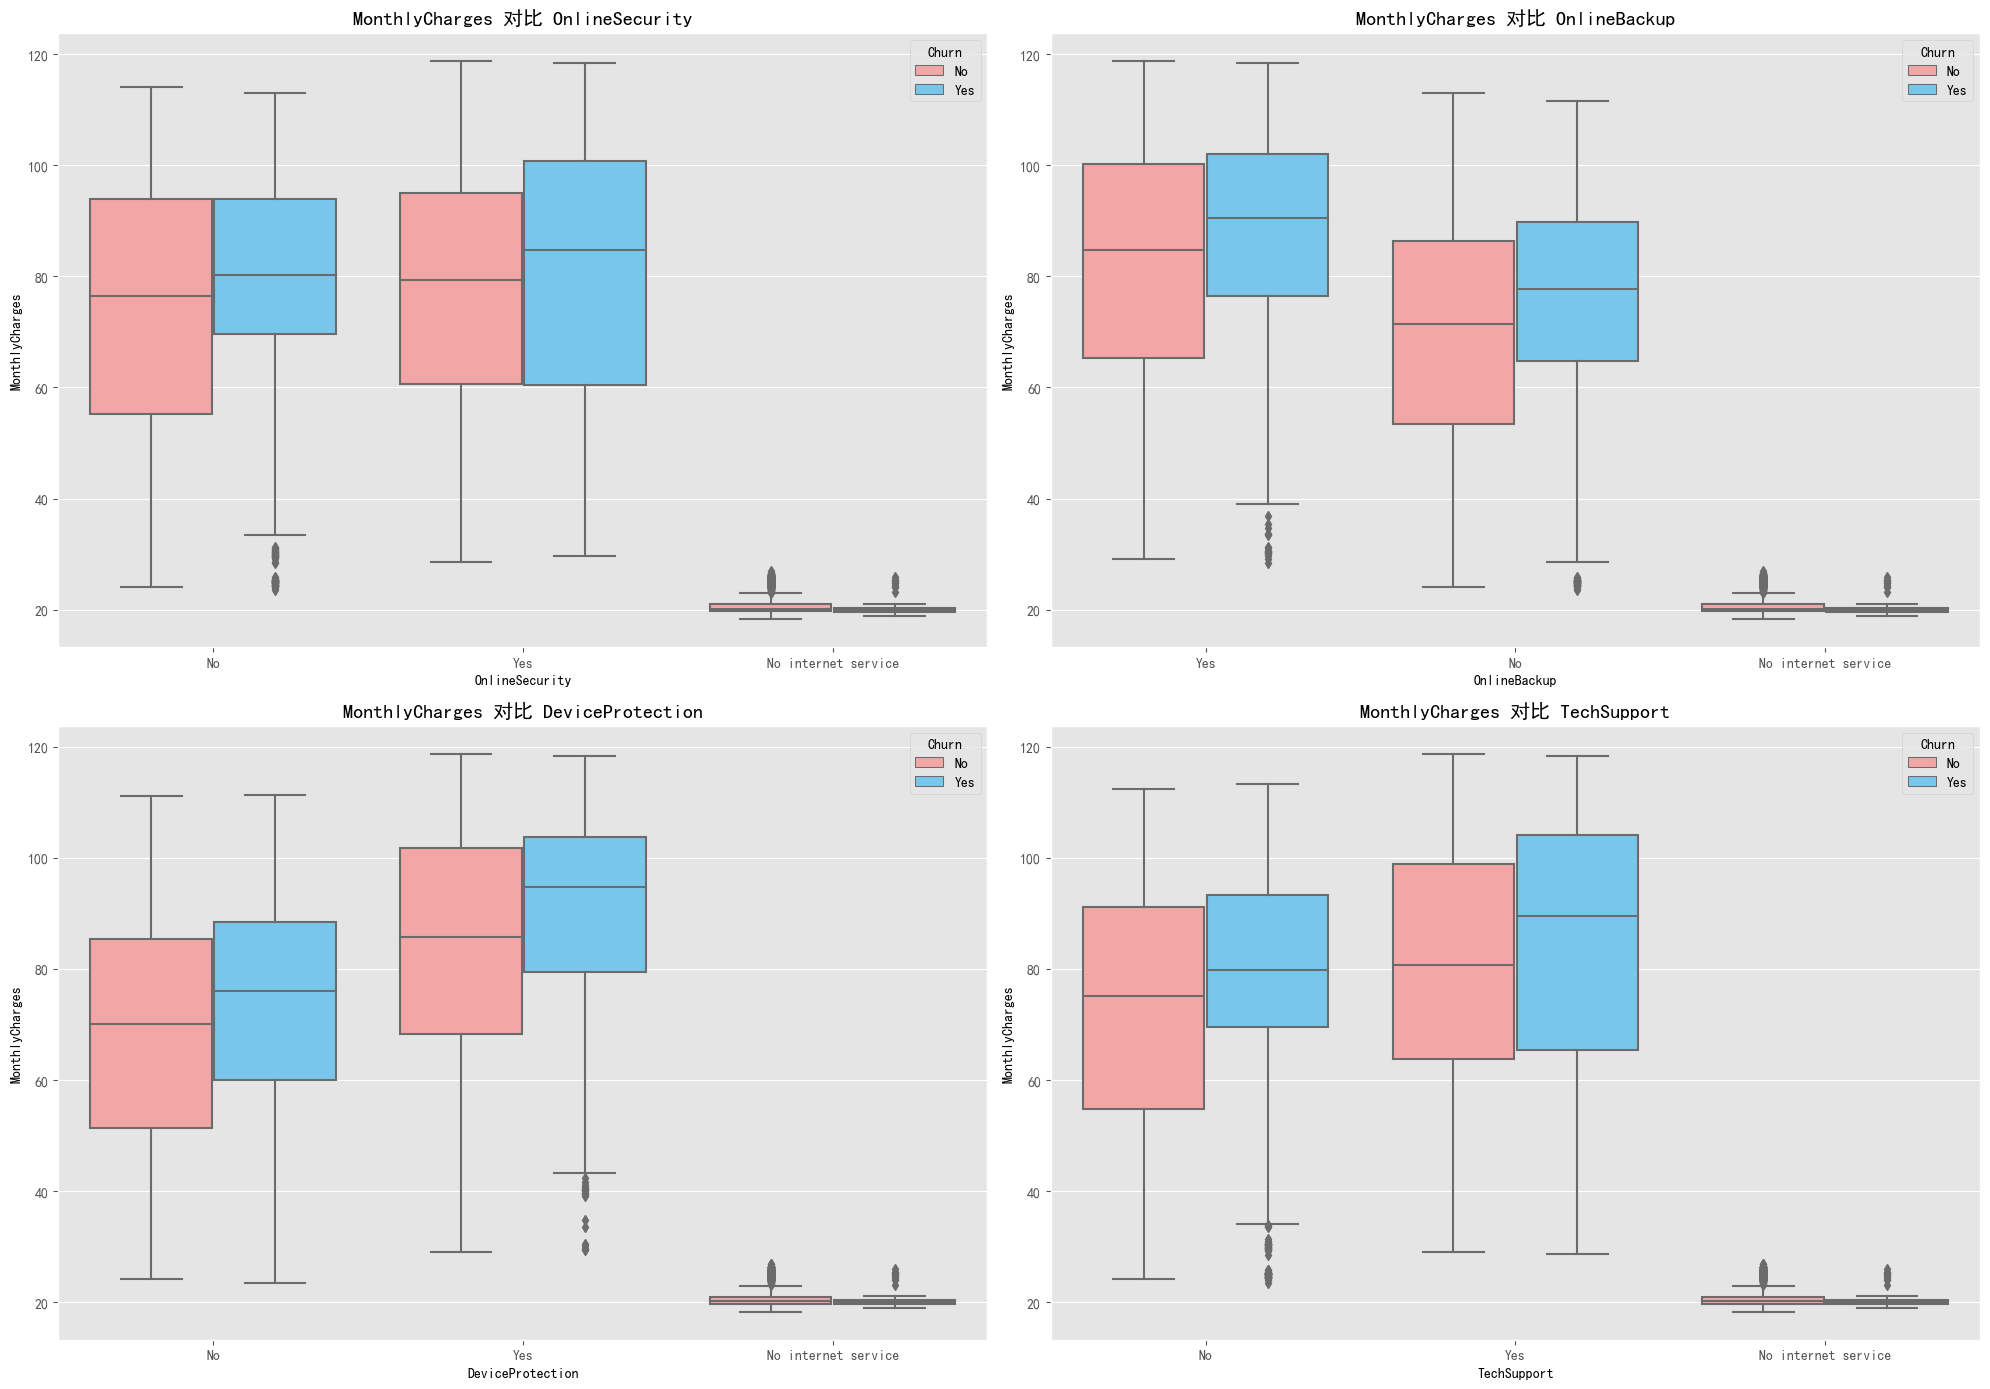

In [32]:
# 初始化2行2列的图形布局，设置图形大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# 遍历l2列表的后四个元素，并在相应的子图上绘制箱线图
for i, feature in enumerate(l2[-4:]):
    ax = axes[i // 2, i % 2]  # 计算子图的位置
    sns.boxplot(x=feature, y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=ax)
    ax.set_title(f'MonthlyCharges 对比 {feature}')  # 使用中文输出标题

# 调整布局，防止标题和标签重叠
plt.tight_layout()


对于网络安全、在线备份、设备保护和技术支持，价值范围大约是从50到100。
订阅这些服务的客户可能不会因为每月费用而考虑取消订阅，因为取消订阅与继续订阅的客户的价值范围大致相同！

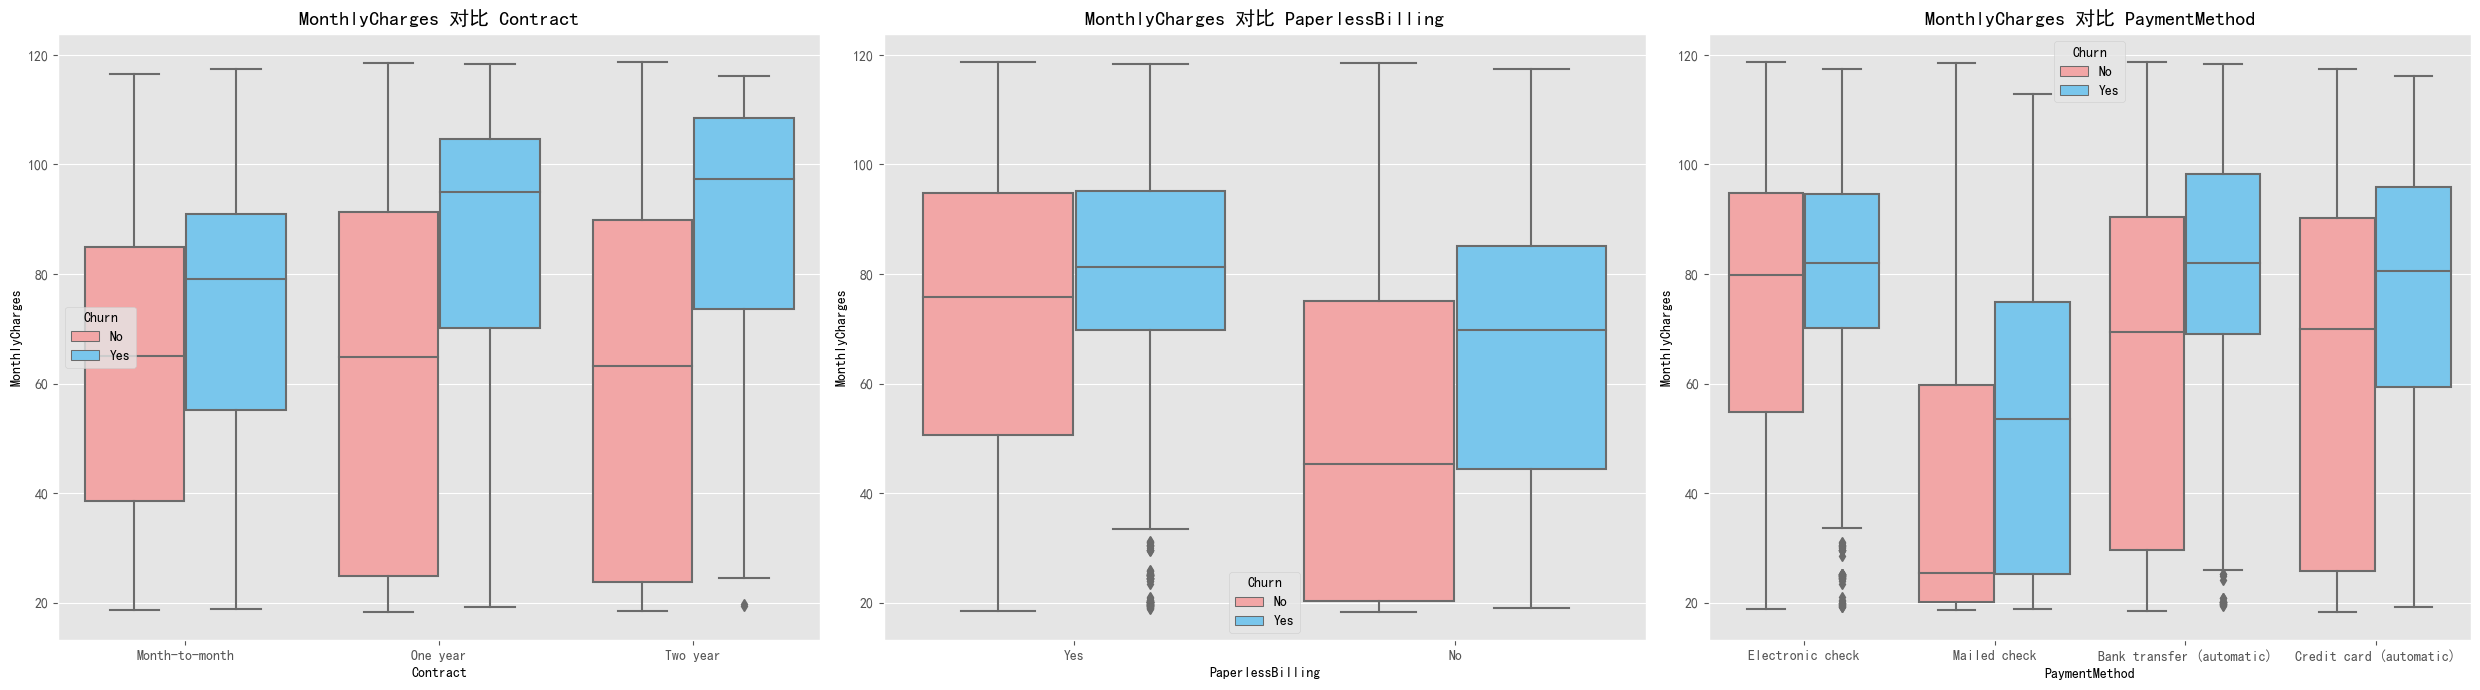

In [33]:
# 使用fig, axes创建1行3列的图形布局，设置适当的大小
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# 遍历l3列表，对每个元素绘制箱线图
for i, feature in enumerate(l3):
    sns.boxplot(x=feature, y='MonthlyCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'MonthlyCharges 对比 {feature}')  # 设置每个子图的标题

# 调整布局，确保标题和标签不会重叠
plt.tight_layout()

月付合约的每月费用下限比一年和两年合约的要高。然而，中断服务的客户的下限值对于月付合约来说却是更低的。
电子支票的下限非常高，这可能是客户不愿使用它的一个重要原因！而邮寄支票的客户流失和继续使用的起始值最低。

## TotalCharges和类别特征的关系

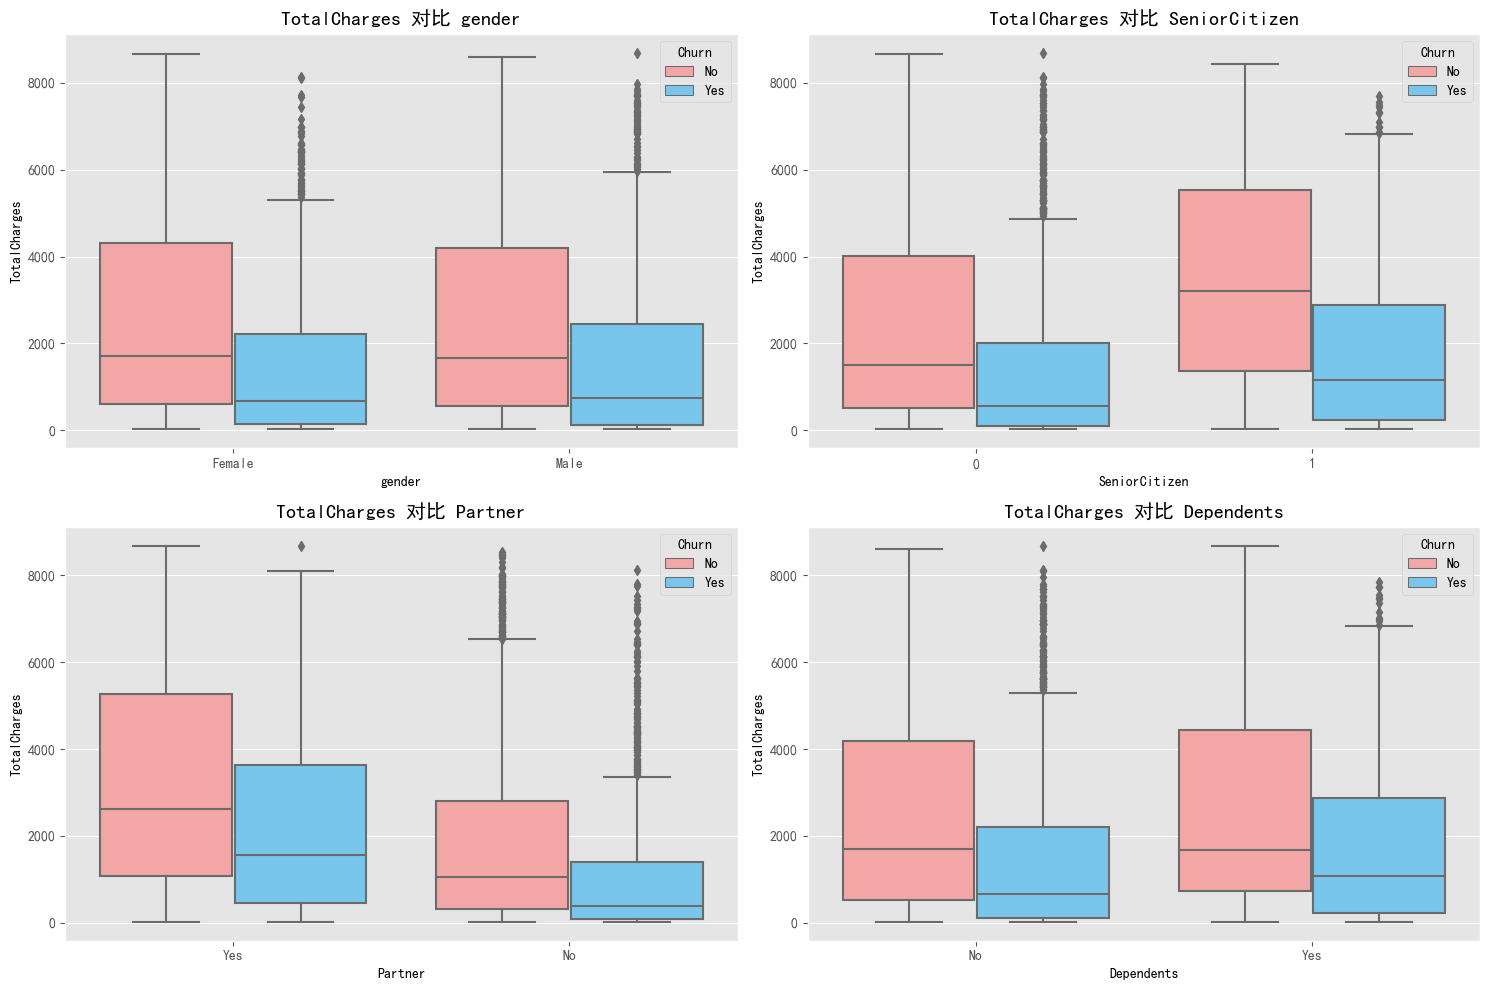

In [34]:
# 初始化2行2列的图形布局，并设置图形的大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# 遍历4次，对应4个子图
for i in range(4):
    # 直接使用axes[i // 2, i % 2]定位子图，并在该子图上绘制箱线图
    sns.boxplot(x=l1[i], y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'TotalCharges 对比 {l1[i]}')  # 设置中文标题

# 调整布局以避免重叠
plt.tight_layout()


男性和女性客户的总费用相当相似！继续使用服务的老年客户的总费用的起始值和结束值较高。
与独居的客户相比，与伴侣同住的客户的总费用的中位数值较高！

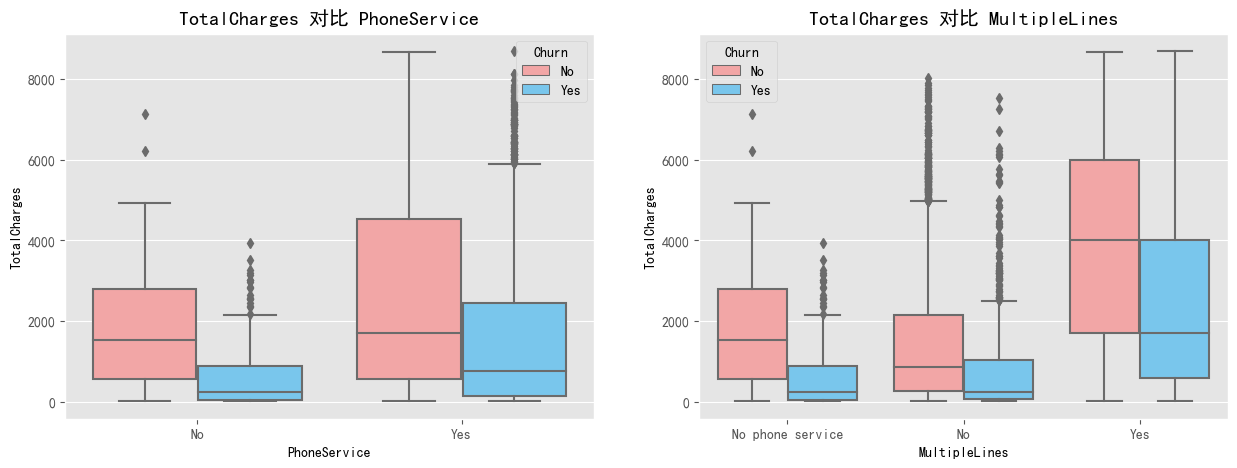

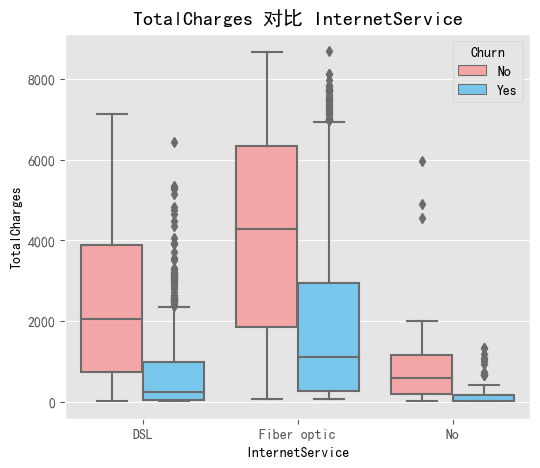

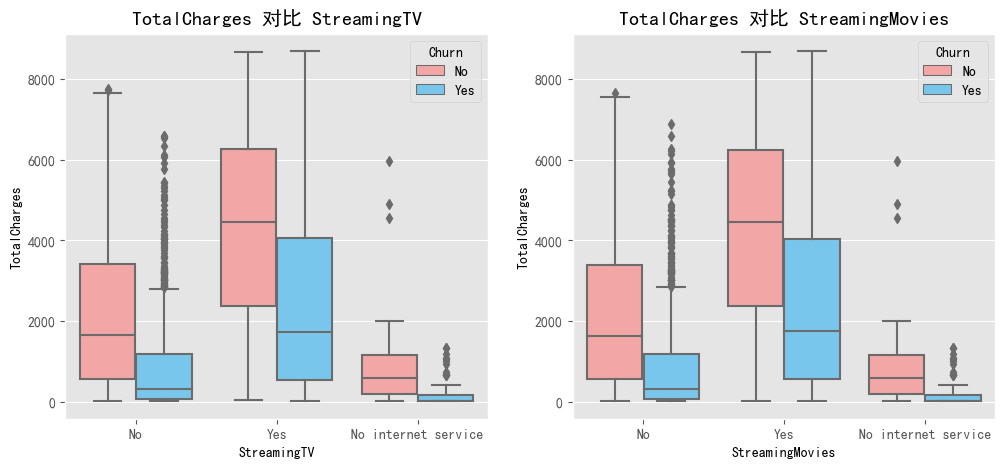

In [35]:
# 创建1行2列的图形布局，并设置图形的大小
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# 遍历l2的前两个元素，绘制箱线图
for i, feature in enumerate(l2[0:2]):
    sns.boxplot(x=feature, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges 对比 {feature}')  # 设置中文标题
# 创建单独的图形布局
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))

# 绘制箱线图
sns.boxplot(x=l2[2], y='TotalCharges', data=data, hue='Churn', palette=colors, ax=ax)
ax.set_title(f'TotalCharges 对比 {l2[2]}')  # 设置中文标题
# 创建1行2列的图形布局，并设置图形的大小
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 遍历l2的第3和第4个元素，绘制箱线图
for i, feature in enumerate(l2[3:5]):
    sns.boxplot(x=feature, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges 对比 {feature}')  # 设置中文标题


电话服务的总费用范围从 0 到 4000 美元。然而，当总费用达到大约 1000 美元左右时，客户开始对电话服务产生疑虑。
同样地，当多线服务的费用接近 2000 美元时，客户开始犹豫是否支付。但是，有些客户似乎非常需要多线服务，因为他们为此支付了大约 6000 美元的费用！
至于光纤光缆，客户在尝试产品时大约会支付 2000 美元。
与光纤光缆、流媒体电视和流媒体电影服务类似，继续使用服务的客户的支付范围从 3000 到 6000 美元。

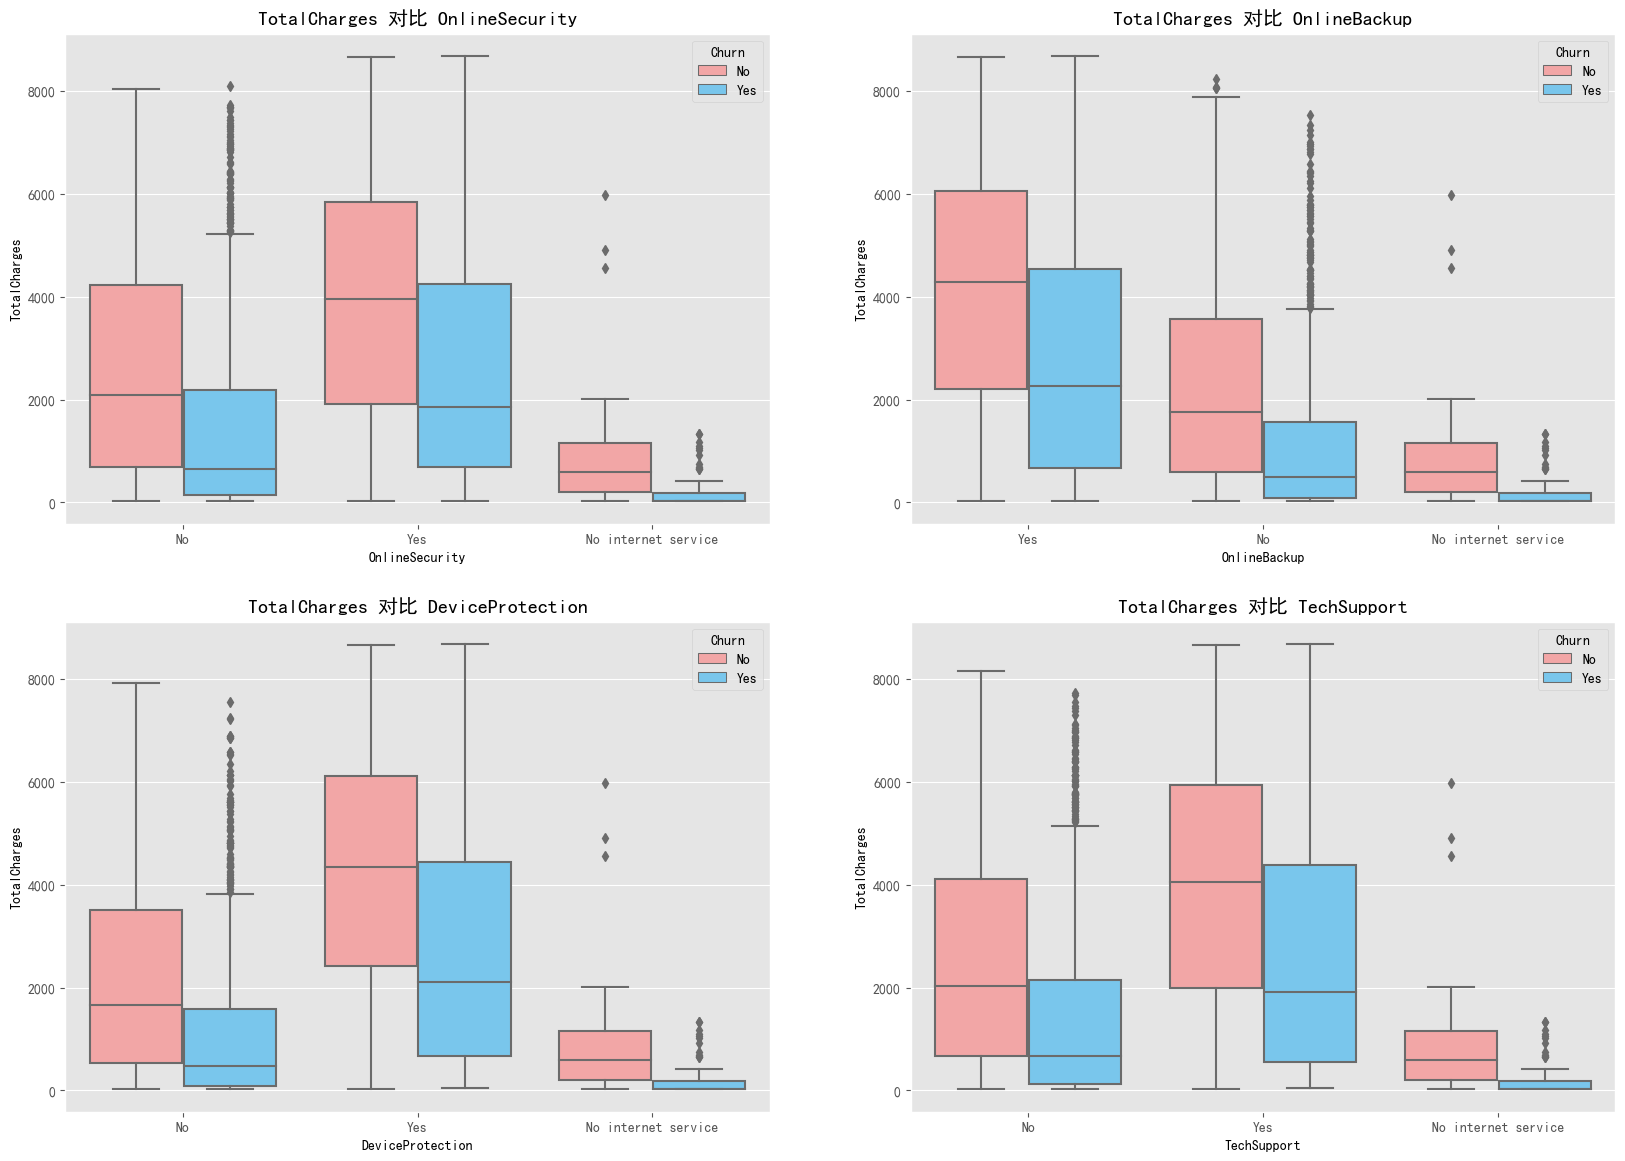

In [36]:
# 初始化2行2列的图形布局，并设置图形的大小
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# 遍历l2列表的最后四个元素
for i, feature in enumerate(l2[-4:]):
    # 直接使用axes数组定位子图，并在该子图上绘制箱线图
    sns.boxplot(x=feature, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'TotalCharges 对比 {feature}')  # 设置中文标题


对于上述提到的所有特性，客户在总费用达到大约 2000 美元时开始对支付产生怀疑。流失客户的中位数值非常接近继续使用此服务的客户的下限。
没有流失的客户准备支付的总费用范围从 2000 到 6000 美元。

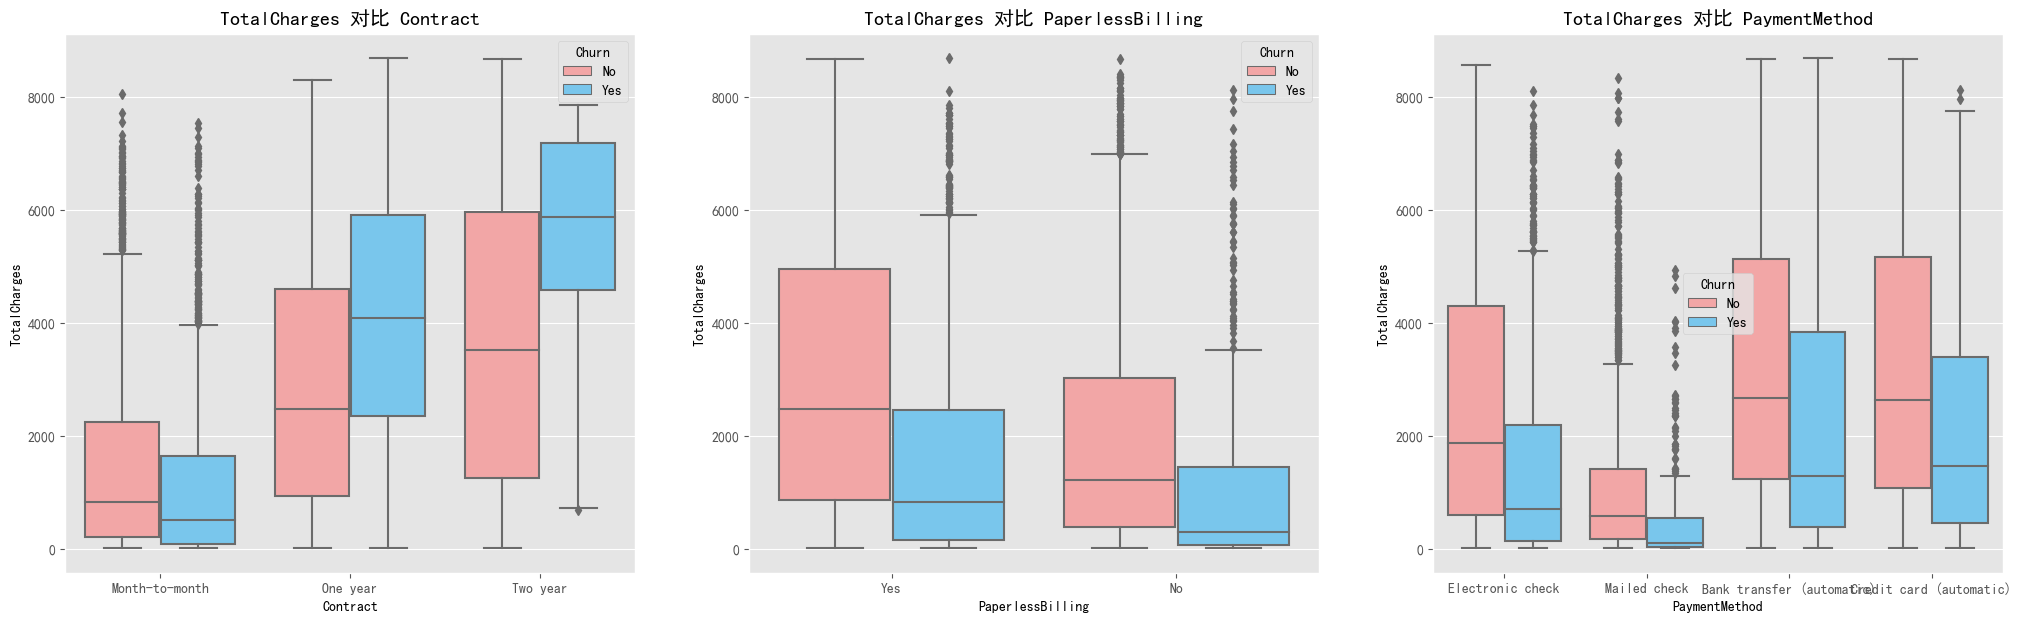

In [37]:
# 创建1行3列的图形布局，并设置图形的大小
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# 遍历l3列表，为每个特征绘制箱线图
for i, feature in enumerate(l3):
    # 直接在指定的子图上绘制箱线图
    sns.boxplot(x=feature, y='TotalCharges', data=data, hue='Churn', palette=colors, ax=axes[i])
    axes[i].set_title(f'TotalCharges 对比 {feature}')  # 使用中文设置标题


选择退出一年和两年合约服务的客户的中位数值分别高达大约 4000 美元和 6000 美元。一些签订两年合约的客户甚至支付了大约 7000 美元。
对于支付方式，客户对使用电子支票支付的范围（0 - 2000 美元）持怀疑态度，而对银行转账（自动）和信用卡（自动）的支付范围大约是 0 - 4000 美元。

## 针对目标特征（churn），分析数值特征内部之间的关系（散点图）

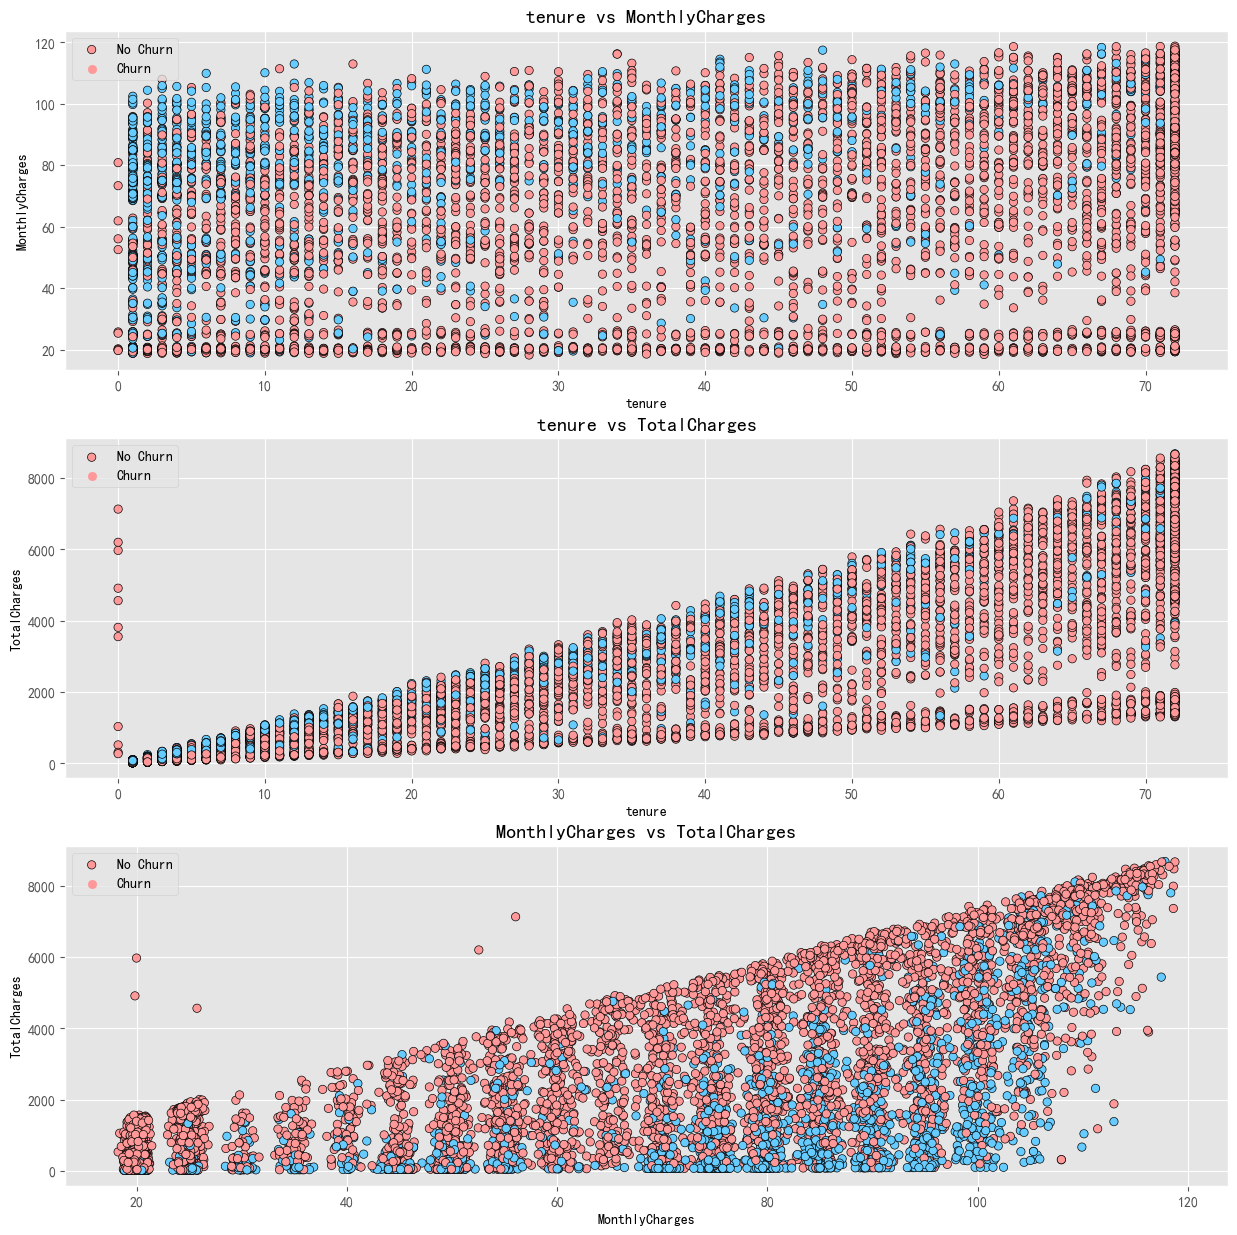

In [38]:
# 初始化3行1列的图形布局，并设置图形大小
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# 设置一个计数器，用于控制绘图的子图位置
a = 0

# 遍历数值特征的所有可能组合
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):  # 确保j>i，避免重复和自己比较
        if a < 3:  # 保证不超过3个子图的限制
            # 在指定的子图上绘制散点图
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df1, hue='Churn', palette=colors, edgecolor='black', ax=axes[a])
            axes[a].legend(['No Churn', 'Churn'], loc='upper left')#在每个散点图的子图上添加图例，'upper left'表示图例将被放置在图表的左上角。
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            axes[a].set_title(title)  # 设置图形标题
            a += 1  # 更新子图索引计数器


对于租期在 0 到 20 个月期间，客户在任何月费用值下的流失都相当频繁。对于租期从 20 到 60 个月，处于月费用值高端的客户，70 到 120 美元，开始退出服务。
对于总费用与租期的关系，随着租期的增加，总费用也随之增加！选择退出计划的客户是那些在其租期内被收费最高的，以及一些总费用排在中间的客户！
当月费用达到 70 美元及以上时，客户似乎决定取消他们的订阅。

# EDA总结

分类特征（顺序）：
- 性别：男性 = 女性
- 高龄用户：非高龄用户 > 高龄用户
- 伴侣：无伴侣 > 有伴侣
- 家属：无家属 > 有家属
- 电话服务：有电话服务 > 无电话服务
- 多线服务：有多线服务 > 无多线服务 > 无电话服务
- 互联网服务：光纤 > DSL > 无互联网服务
- 在线安全：无 > 有 > 无互联网服务
- 在线备份：无 > 有 > 无互联网服务
- 设备保护：无 > 有 > 无互联网服务
- 技术支持：无 > 有 > 无互联网服务
- 流媒体电视：无 > 有 > 无互联网服务
- 流媒体电影：无 > 有 > 无互联网服务
- 合约：按月 > 一年 > 两年
- 无纸化账单：有 > 无
- 支付方式：电子支票 > 邮寄支票 > 银行转账（自动） > 信用卡（自动）

数值特征（范围）：
- 租期：1 - 5个月
- 月费用：65 - 105
- 总费用：0 - 1000

# 特征工程

Data Scaling 

机器学习模型并不理解特征值的单位。它仅仅将输入当作一个简单的数字，但不理解该值的真实含义。因此，对数据进行缩放变得非常必要。例如：年龄 = 年；空腹血糖 = 毫克/分升；费用 = 货币单位。

我们有两种数据缩放选项：1）归一化 2）标准化。由于大多数算法假设数据呈正态（高斯）分布，对于那些数据未显示正态分布的特征进行归一化，而对于那些正态分布但其值与其他特征相比非常大或非常小的特征进行标准化。

归一化：由于显示了右偏斜和双峰数据分布，因此对tenure（在职时间）、MonthlyCharges（月费用）和TotalCharges（总费用）特征进行了归一化。

标准化：对于上述数据，没有特征进行标准化。

归一化是一种将数据缩放到0到1之间的技术，

适用于特征值在0到1之间，没有负值的情况。

有助于防止某些特征（通常是因为它们具有较大的值范围）在模型训练中占主导地位。

它还有助于加快训练速度，并使得不同特征的权重更加公平。


标准化是一种将数据转换为具有！均值为0和标准差为1的某种类型分布（如正态分布）！的技术

适用于特征值可以是负数，并且有较大的方差的情况

有助于防止某些特征的方差过大而导致模型训练不稳定。

它还有助于模型更容易捕捉特征之间的差异。

## 对数值特征进行归一化

In [39]:
from sklearn.preprocessing import MinMaxScaler #, StandardScaler

# 实例化归一化处理器
mms = MinMaxScaler()#这行代码创建了一个MinMaxScaler的实例，并将其存储在变量mms中。

# 删除不需要的列
df1.drop(columns=['MonthlyCharges_Group', 'TotalCharges_Group'], inplace=True)

# 使用归一化处理特定的列
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df1[columns_to_scale] = mms.fit_transform(df1[columns_to_scale])
#fit_transform方法首先计算这些列的缩放比例，然后应用这些比例来缩放数据。

# 显示处理后的前几行数据以检查
df1.head()


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0    0.01             0   
1       1              0        0           0    0.47             1   
2       1              0        0           0    0.03             1   
3       1              0        0           0    0.62             0   
4       0              0        0           0    0.03             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2            0.12          0.00      0  
1                 0              3            0.39          0.22      0  
2                 1              3            0.35          0.01      1  
3                 0              0            0.24          0.21      0  
4                 1              2            0.52          0.02      1

## 计算所有特征（数值特征和类别特征）与目标特征的相关性（相关系数、热力图）

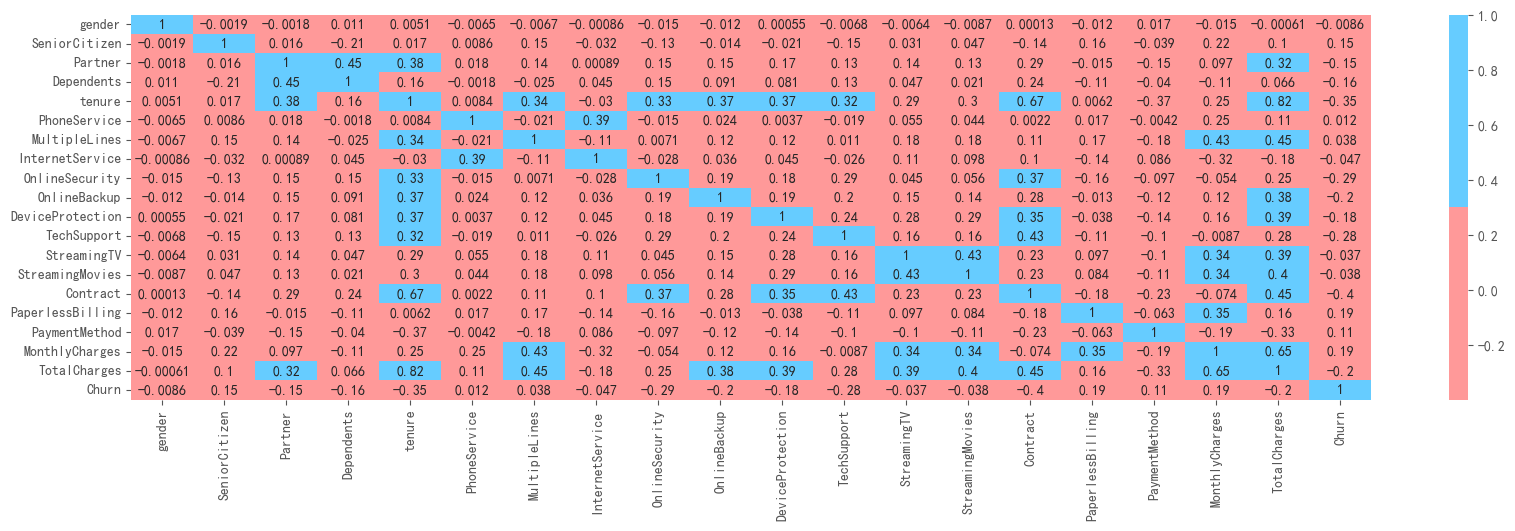

In [40]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);
###
这行代码使用seaborn的heatmap函数绘制热力图。
df1.corr()返回了df1数据集中各特征之间的相关系数矩阵，
cmap参数指定了颜色映射，用于表示不同相关系数的颜色范围，
annot参数设置为True表示在热力图上显示数值，
###

这是一个包含太多特征的庞大矩阵。我们只检查流失情况（Churn）检查相关性。

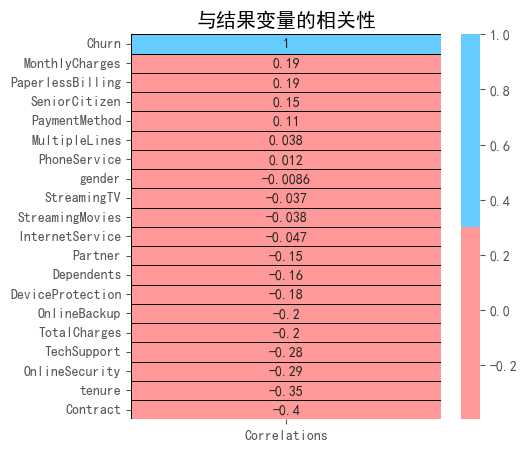

In [41]:
# 计算与'Churn'的相关性并排序
corr = df1.corrwith(df1['Churn']).sort_values(ascending=False).to_frame()
###
df1: 这是要计算相关性的DataFrame。在这个例子中，df1包含多个特征列，以及Churn列，这是我们要计算相关性的目标列。
df1['Churn']: 这是我们要计算相关性的目标Series。在这个例子中，它是指df1中的Churn列。
corrwith: 这是corrwith函数本身，它是pandas库中的一个内置函数，用于计算列与Series之间的相关性。
sort_values(ascending=False): 这是对相关性Series进行排序的代码。sort_values函数用于对Series进行排序，
而ascending=False参数确保了排序是按照降序进行的，即相关系数最高的特征排在最前面。
to_frame(): 这是将排序后的Series转换为一个DataFrame的代码。
to_frame函数将Series转换为DataFrame，其中包含一个列，列名为corr。
###
corr.columns = ['Correlations']  # 设置相关性列的列名

# 创建一个图形和子图对象，设置图形大小
fig, ax = plt.subplots(figsize=(5, 5))

# 绘制热力图，显示数值注释
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black', ax=ax)
###
annot=True参数表示在热力图上显示数值注释，
cmap参数指定了颜色映射，用于表示不同相关系数的颜色范围，
linewidths=0.4参数设置了热力图边框的宽度，
linecolor='black'参数设置了边框的颜色，
ax=ax参数表示将热力图绘制在之前创建的子图对象ax上。
###

# 设置图形标题
ax.set_title('与结果变量的相关性');

# 显示图形
plt.show()


多线路（MultipleLines）、电话服务（PhoneService）、性别（gender）、流媒体电视（StreamingTV）、流媒体电影（StreamingMovies）和互联网服务（InternetService）没有显示任何相关性。我们将剔除相关系数在（-0.1, 0.1）之间的特征。剩余的特征要么显示出显著的正相关，要么显示出显著的负相关。

## 计算类别特征和目标特征的相关性（卡方检验、热力图）

卡方检验（Chi-square test）是一种统计方法，用于检验两个分类变量之间是否存在显著的关联性。

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

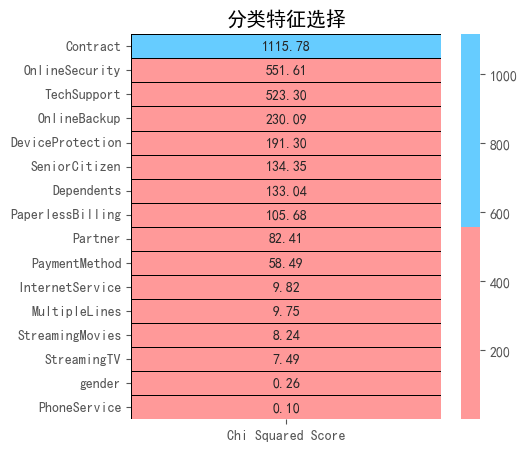

In [43]:
# 提取类别特征和目标变量
features = df1.loc[:, categorical_features]
###
提取了df1数据集中categorical_features列表中的特征列。
loc[:, ]表示选择所有行和所有列，但是只选择那些列名在categorical_features列表中的列。
###
target = df1.loc[:, 'Churn']#这行代码提取了df1数据集中'Churn'列，这将是我们的目标变量。

# 使用卡方检验选择最佳特征
best_features = SelectKBest(score_func=chi2, k='all')
###
这行代码创建了一个SelectKBest类的实例，用于选择最佳特征。
score_func参数指定了用于计算特征得分的方法，这里使用的是卡方检验（chi2），
k参数指定了要选择的特征数量，这里设置为'all'，表示选择所有的特征。
###
fit = best_features.fit(features, target)
###
这行代码使用best_features实例来计算特征得分，并将其存储在fit变量中。
fit对象包含了特征得分和特征选择的信息。
###

# 创建特征得分的DataFrame
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])
###
fit.scores_是特征得分的列表，
list(features.columns)是特征列的名称列表，它们被用作DataFrame的索引和列名。
###

# 设置图形大小，并绘制热力图显示特征得分
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('分类特征选择');
plt.show()


电话服务（PhoneService）、性别（gender）、流媒体电视（StreamingTV）、流媒体电影（StreamingMovies）、多线路（MultipleLines）和互联网服务（InternetService）与客户流失（Churn）的关系非常低。

## 计算数值特征和目标特征的相关性（ANOVA检验、热力图）

ANOVA（Analysis of Variance，方差分析）是一种统计方法，用于比较两个或多个总体的均值是否存在显著差异。

In [44]:
from sklearn.feature_selection import f_classif

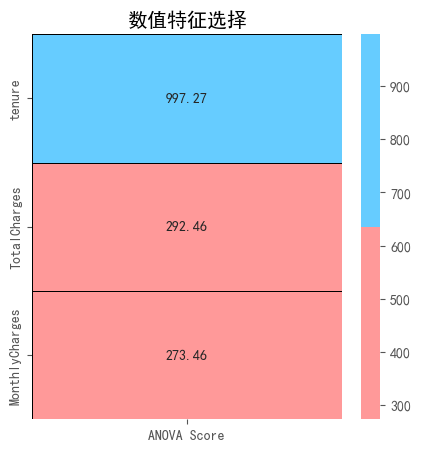

In [45]:
# 提取数值特征和目标变量
features = df1.loc[:, numerical_features]
target = df1.loc[:, 'Churn']

# 利用ANOVA选择最佳特征
best_features = SelectKBest(score_func=f_classif, k='all')
###
这行代码创建了一个SelectKBest类的实例，用于选择最佳特征。
score_func参数指定了用于计算特征得分的方法，这里使用的是ANOVA（f_classif），
k参数指定了要选择的特征数量，这里设置为'all'，表示选择所有的特征。
###
fit = best_features.fit(features, target)
###
这行代码使用best_features实例来计算特征得分，并将其存储在fit变量中。
fit对象包含了特征得分和特征选择的信息。
###

# 将特征得分转换为DataFrame
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])
###
这行代码创建了一个新的DataFrame对象featureScores，用于存储特征得分。
data=fit.scores_：这指定了DataFrame中的数据，即fit.scores_。fit是之前通过SelectKBest实例计算的特征得分对象，scores_属性包含了每个特征的得分。
index=list(features.columns)：这指定了DataFrame的索引，即特征列的名称。list(features.columns)是将features DataFrame的列名转换为一个列表。
columns=['ANOVA Score']：这指定了DataFrame的列名，即特征得分的名称。这里，每个特征的得分都被命名为'ANOVA Score'。
###


# 创建图形对象，设置大小，并绘制热力图
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('数值特征选择');
plt.show()


根据ANOVA测试，ANOVA得分越高，特征的重要性就越大。根据上述结果，我们需要包含所有的数值特征进行建模。

In [46]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0    0.01               0             2   
1              0        0           0    0.47               2             0   
2              0        0           0    0.03               2             2   
3              0        0           0    0.62               2             0   
4              0        0           0    0.03               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0            0.12          0.00      0  
1            0.39          0.22      0  
2            0.35          0.01      1  
3            0.24          0.21      0  
4            0.52          0.02      1

# 数据平衡（确保数据集中的正类和负类样本数量大致相等）

数据平衡是指在机器学习中，确保数据集中的正类和负类样本数量大致相等。

不平衡的数据集指的是正类样本和负类样本的数量差异很大，这可能会导致模型在训练过程中过度关注数量较多的类，从而在测试集上对数量较少的类表现不佳。

在现实世界的应用中，不平衡数据集非常常见。
例如，在金融欺诈检测中，欺诈交易的数量远少于正常交易的数量。如果直接使用这样的数据集来训练模型，模型可能会更加关注正常交易的特征，而忽略了欺诈交易的特征，导致模型在检测欺诈交易时的性能不佳。

为了克服数据不平衡的问题，可以采取以下几种策略：

1.过采样：通过复制正类样本或合成新样本来增加正类样本的数量。

2.欠采样/下采样：通过随机删除一些负类样本或正类样本来减少负类样本的数量。

3.合成样本：使用生成模型（如GANs）来生成新的正类样本。

4.代价敏感学习：在模型训练时，为正类样本分配更高的权重，以鼓励模型更准确地识别正类样本。

5.使用不同的性能指标：如F1分数、AUC-ROC曲线等，这些指标可以更好地反映模型在少数类样本上的性能。

数据平衡是确保机器学习模型在实际应用中能够准确预测所有类别的重要步骤。

SMOTE（Synthetic Minority Over-sampling Technique，合成少数类过采样技术）是一种用于处理数据不平衡问题的过采样技术。

SMOTE的主要思想是在少数类样本之间创建新的合成样本，以增加少数类的样本量，从而平衡数据集

使用SMOTE进行数据平衡：  
为了应对不平衡数据，有两个选择：

1. 下采样（Undersampling）：减少目标变量的多数类样本。
2. 过采样（Oversampling）：增加目标变量的少数类样本至多数类样本的数量。

在进行了下采样和过采样的尝试和错误之后，我们决定采用过采样！  
为了数据平衡，我们将使用imblearn库。  
pip命令：pip install imbalanced-learn

In [47]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
# 使用SMOTE方法进行过采样以平衡数据集
over = SMOTE(sampling_strategy=1)
###
这行代码创建了一个SMOTE类的实例，用于处理不平衡数据集。
sampling_strategy=1参数表示我们希望少数类（在这个例子中是类别1）的样本数量与
多数类（在这个例子中是类别0）的样本数量相等。
###

# 提取特征变量和目标变量
f1 = df1.iloc[:, :13].values#这行代码提取了df1数据集中前13列的特征数据，并将它们转换为一个NumPy数组。
t1 = df1.iloc[:, 13].values#这行代码提取了df1数据集中第13列的目标变量数据，并将它们转换为一个NumPy数组。

# 应用SMOTE算法
f1, t1 = over.fit_resample(f1, t1)
###
这行代码使用之前创建的SMOTE实例对特征变量f1和目标变量t1进行过采样。
fit_resample方法会根据SMOTE对象的sampling_strategy参数调整数据集，以确保少数类的样本数量与多数类的样本数量相等。
###

# 输出经过重采样后的目标变量分布
print(Counter(t1))
###
这行代码使用Counter函数统计了目标变量t1中每个类别的样本数量，并打印出来。
Counter是一个计数器，它可以快速计算序列中每个元素的出现次数。
###

SyntaxError: invalid character '，' (U+FF0C) (2294960053.py, line 4)

# 建模

In [49]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score, RocCurveDisplay, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier  # 示例，你可以替换成任何其他分类器

# 假设 f1 是你的特征数据，t1 是你的目标变量
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.20, random_state=2)
###
使用train_test_split函数将特征数据f1和目标变量t1划分为训练集和测试集。
test_size=0.20表示测试集的大小为20%，
random_state=2用于设置随机种子，以确保结果的可重复性。
###

def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)#使用训练特征和标签来训练分类器
    prediction = classifier.predict(x_test)#使用测试特征来预测标签
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    ###
    这行代码创建了一个RepeatedStratifiedKFold对象，用于执行重复分层K折交叉验证。
    n_splits=10表示数据集将被分为10个折叠，
    n_repeats=3表示每个折叠将被重复3次，
    random_state=1用于设置随机种子。
    ###
    
    print("Cross Validation Score: ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    ###
    这行代码打印了分类器在交叉验证集上的ROC AUC得分。
    {0}：这是一个占位符，它会被后面的数字替换。在这个例子中，它表示我们要格式化的数字。
    :.2：这是一个格式化说明符，表示小数点后的精度。在这个例子中，它表示保留两位小数。
    %：这是一个格式化说明符，表示将数字转换为百分比形式。
    .format表示转化为字符串格式
    
    cross_val_score函数用于计算分类器的性能得分，
    scoring='roc_auc'参数指定使用ROC AUC评分。
    cv=cv参数指定了交叉验证的参数，即RepeatedStratifiedKFold对象。
    .mean()方法计算了交叉验证得分的平均值。
    ###
    
    print("ROC_AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    ###
    使用了roc_auc_score函数来计算预测标签prediction和真实标签y_test之间的ROC AUC得分。
    ###
    
    # ROC 曲线
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

#混沌矩阵
    def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    ###
    confusion_matrix：这是sklearn.metrics模块中的一个函数，用于计算混淆矩阵。
    classifier.predict(x_test)：使用分类器对测试数据集的特征进行预测，返回预测的标签。
    cm：这是一个变量，用于存储由confusion_matrix函数返回的混淆矩阵。
    ###
    
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    ###
    counts：这是一个列表推导式，用于创建一个列表。
    cm.flatten()：将混淆矩阵cm转换为一个一维数组。
    value：这是一个循环变量，用于遍历cm.flatten()返回的一维数组中的每个元素。
    [value for value in cm.flatten()]：这将创建一个列表，包含了一维数组中所有的元素，即混淆矩阵中每个部分的计数。
    ###
    
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    ###
    percentages：这是一个列表推导式，用于创建一个列表，包含每个混淆矩阵部分占总数的百分比。
    '{0:.2%}'.format(value)：这是一个字符串格式化表达式，用于将数字value格式化为百分比，并保留两位小数。
    value in cm.flatten() / np.sum(cm)：这里计算了每个混淆矩阵部分的值除以混淆矩阵所有值之和，得到百分比。
    ###
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    ###
    labels：这是一个列表推导式，用于创建一个新的列表，每个元素是一个字符串，包含了名称、计数和百分比。
    f'{v1}\n{v2}\n{v3}'：这是一个格式化字符串，用于创建一个新的字符串，其中\n表示换行符，用于分隔名称、计数和百分比。
    v1, v2, v3：这些是循环变量，用于遍历由zip(names, counts, percentages)返回的元组。
    zip(names, counts, percentages)：这是一个函数，用于将多个列表（或元组）组合成一个元组列表。
    ###
    labels = np.asarray(labels).reshape(2, 2)
    ###
    labels：这是前面创建的列表，现在将被转换并重新赋值。
    np.asarray(labels)：这是一个NumPy函数，用于将列表labels转换为NumPy数组。
    .reshape(2, 2)：这是NumPy数组的方法，用于重新调整数组的形状为2行2列，以匹配混淆矩阵的形状。
    ###
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', square=True)
    ###
    sns.heatmap：这是Seaborn库中的函数，用于绘制热力图。
    cm：这是前面计算得到的混淆矩阵。
    annot=labels：这个参数指定了在每个热力图单元上显示的注释。这里使用的是之前创建的labels数组，它包含了名称、计数和百分比。
    cmap='Blues'：这个参数指定了颜色映射（colormap）为’Blues’，这意味着热力图的颜色将基于蓝色调。
    fmt=''：这个参数指定了数字的格式化字符串。在这里设置为空字符串意味着不应用任何特定的格式化。
    square=True：这个参数确保热力图的每个单元格都是正方形。
    ###
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

1. xgbt

In [50]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
###
classifier_xgb：这是一个变量，用于存储创建的XGBoost分类器实例。
XGBClassifier()：这是创建XGBoost分类器实例的构造函数。
learning_rate=0.01：这是构造函数的一个参数，指定了学习率（也称为收缩率）。
较小的学习率通常会导致模型训练更慢，但有助于提高模型的泛化能力。默认值为0.1。
max_depth=3：这是构造函数的一个参数，指定了树的最大深度。
增加树的最大深度可以使模型更复杂，可能会提高对训练数据的拟合，但也可能导致过拟合。默认值为6。
n_estimators=1000：这是构造函数的一个参数，指定了要构建的决策树的数量。
增加树的数量可以提高模型的性能，但也可能导致训练时间增加。默认值为100。
###

Cross Validation Score:  90.37%
ROC_AUC Score:  82.24%


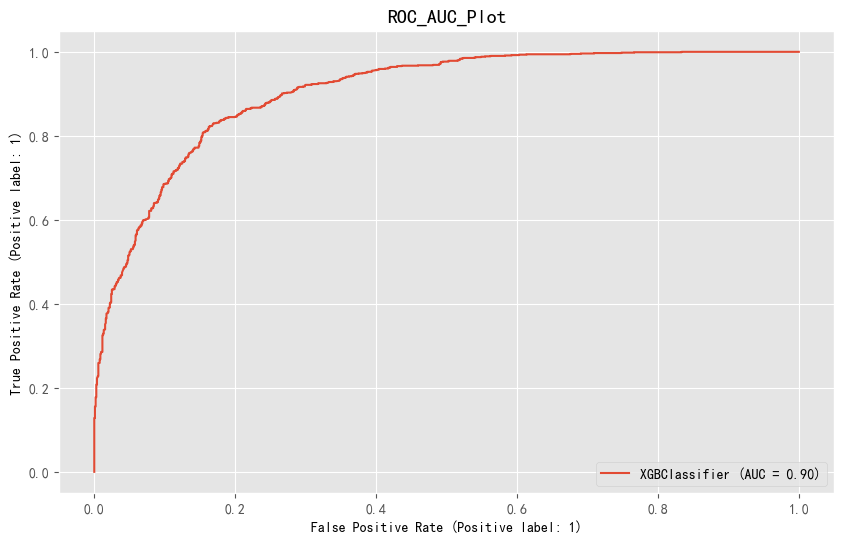

In [51]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

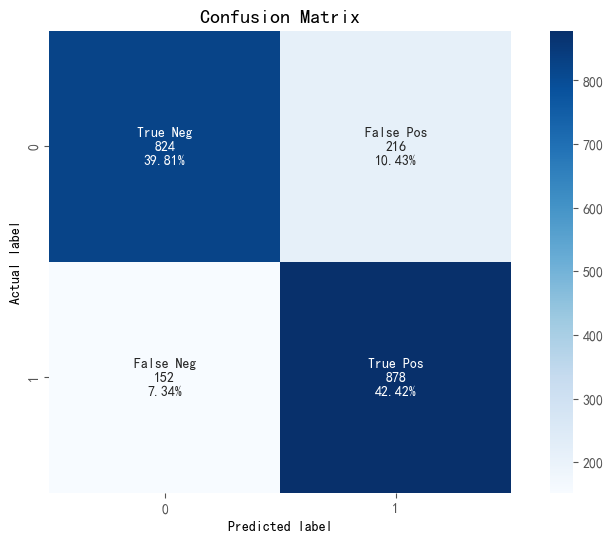

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1040
           1       0.80      0.85      0.83      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [52]:
model_evaluation(classifier_xgb,x_test,y_test)

2. lightgbm

In [53]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

[LightGBM] [Info] Number of positive: 4144, number of negative: 4134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3730, number of negative: 3720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3730, number of negative: 3721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 7451, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 3730, number of negative: 3721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1124
[LightGBM] [Info] Number of data points in the train set: 7451, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5006

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 3729, number of negative: 3721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 7450, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500537 -> initscore=0.002148
[LightGBM] [Info] Start training from score 0.002148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 3730, number of negative: 3721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 7451, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500604 -> initscore=0.002416
[LightGBM] [Info] Start training from score 0.002416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

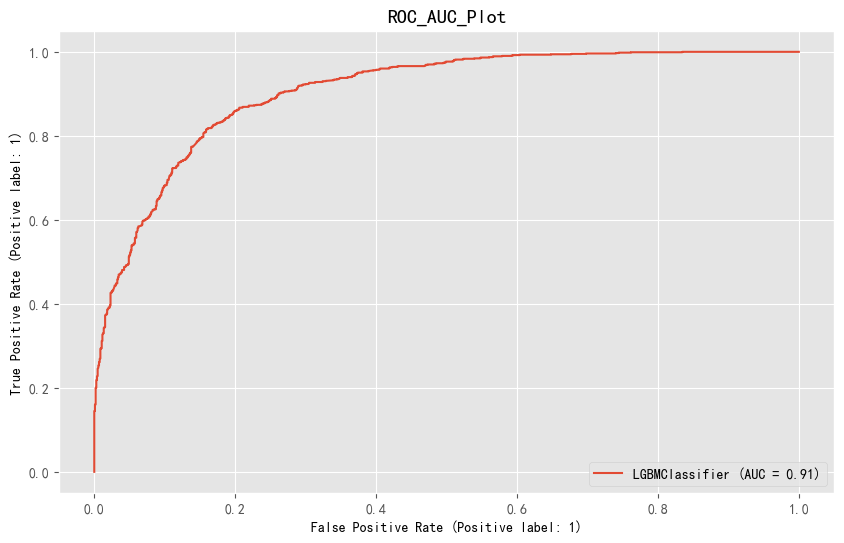

In [54]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

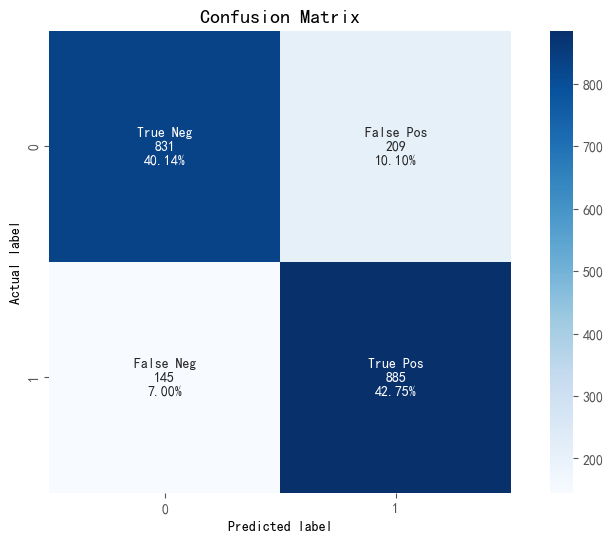

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1040
           1       0.81      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [55]:
model_evaluation(classifier_lgbm,x_test,y_test)

3. random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
###
classifier_rf：这是一个变量，用于存储创建的随机森林分类器实例。
RandomForestClassifier()：这是sklearn.ensemble模块中的一个类，用于实现随机森林算法。
随机森林是一种集成学习方法，它通过构建多个决策树并进行投票来提高预测的准确性和稳定性。
max_depth = 4：这是RandomForestClassifier构造函数的一个参数，用于指定决策树的最大深度。
在这里，max_depth被设置为4，这意味着每个决策树的最大深度为4层。限制树的深度有助于防止过拟合。
random_state = 0：这是RandomForestClassifier构造函数的一个参数，用于设置随机数生成器的种子。
设置random_state的目的是为了确保结果的可重复性，即每次运行代码时都能得到相同的随机森林模型。
在这里，random_state被设置为0。
###

Cross Validation Score:  85.70%
ROC_AUC Score:  78.44%


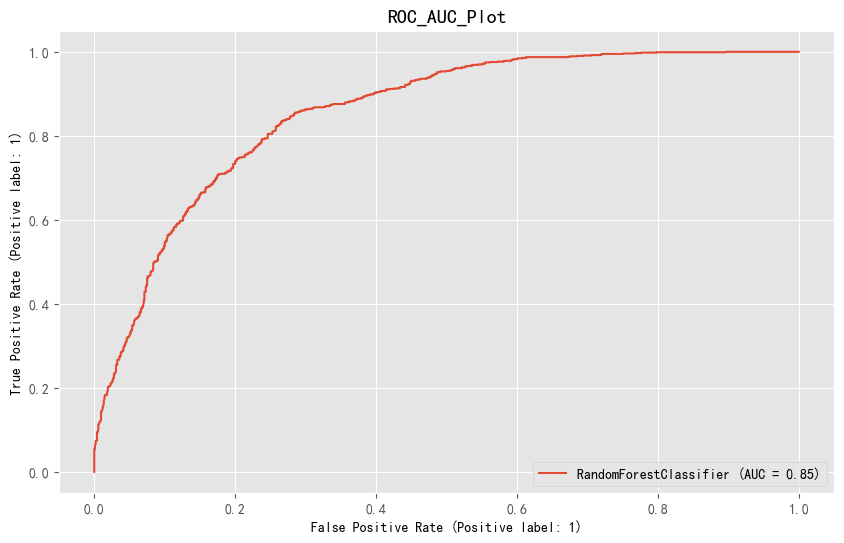

In [58]:
model(classifier_rf,x_train,y_train,x_test,y_test)

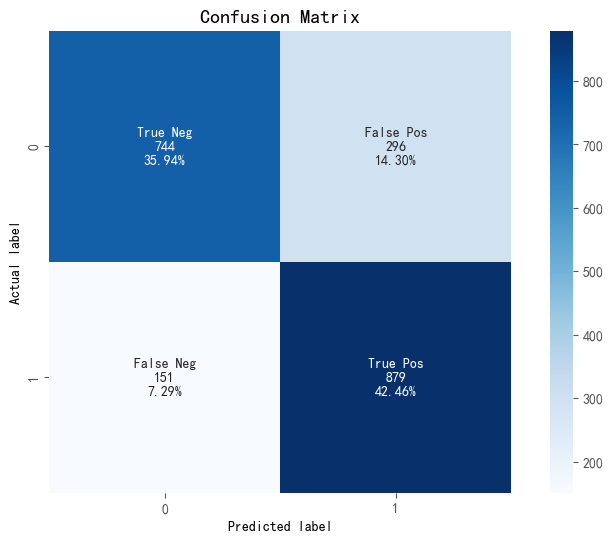

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1040
           1       0.75      0.85      0.80      1030

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



In [59]:
model_evaluation(classifier_rf,x_test,y_test)

4. decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
###
classifier_dt：这是一个变量，用于存储创建的决策树分类器实例。
DecisionTreeClassifier()：这是sklearn.tree模块中的一个类，用于实现决策树算法。
决策树是一种用于分类和回归的非参数监督学习方法。
random_state = 1000：这是DecisionTreeClassifier构造函数的一个参数，用于设置随机数生成器的种子。
设置random_state的目的是为了确保结果的可重复性，即每次运行代码时都能得到相同的决策树模型。
在这里，random_state被设置为1000。
max_depth = 4：这是DecisionTreeClassifier构造函数的一个参数，用于指定决策树的最大深度。
在这里，max_depth被设置为4，这意味着决策树的最大深度为4层。限制树的深度有助于防止过拟合。
min_samples_leaf = 1：这是DecisionTreeClassifier构造函数的一个参数，用于指定叶子节点所需的最小样本数。
在这里，min_samples_leaf被设置为1，这意味着叶子节点可以只有一个样本。
增加min_samples_leaf的值可以防止模型在训练数据上过度拟合。
###

Cross Validation Score:  84.27%
ROC_AUC Score:  76.85%


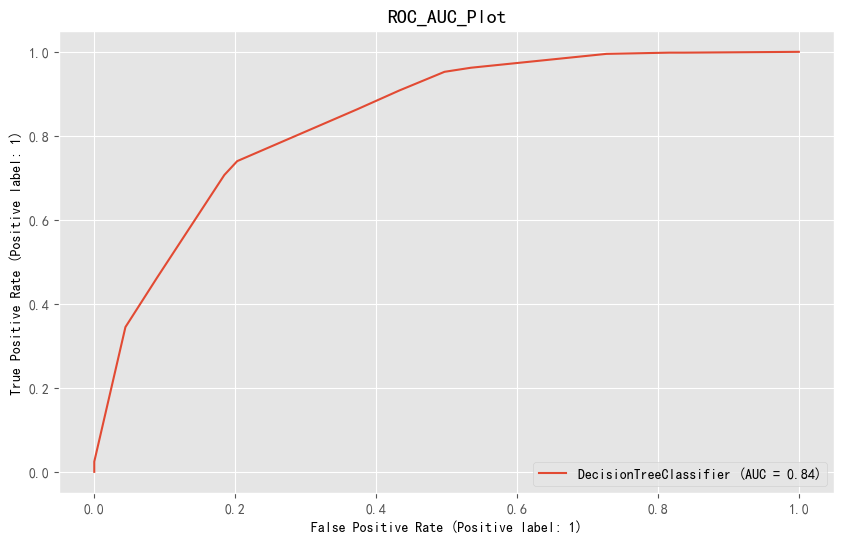

In [62]:
model(classifier_dt,x_train,y_train,x_test,y_test)

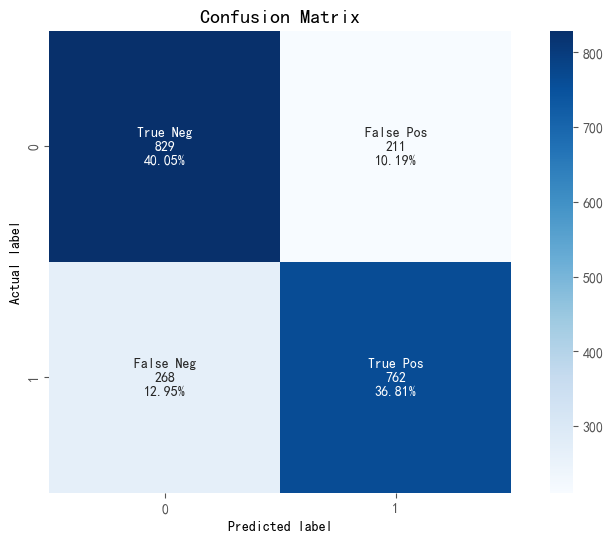

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1040
           1       0.78      0.74      0.76      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [63]:
model_evaluation(classifier_dt,x_test,y_test)

# 数据分析结论

为了降低客户流失率和增加收入，有几项措施需要采取，首印象极其重要！目标客户群应该包括：高龄客户、有伴侣的客户以及独居客户。

高龄客户虽然数量不多，但他们的月费用下限比其他客户高，这意味着高龄客户愿意支付更高的费用，但他们需要相应水平的服务。对于有伴侣的客户和独居客户来说，他们更倾向于选择月费低于65美元的服务。

为了建立坚实的客户基础，电信公司需要为其服务创造一个简单且经济实惠的入门点。在最初的6个月内，需要重点关注在线安全、在线备份、设备保护和技术支持，因为这段时间对客户来说最为关键和不确定。他们必须降低这些服务40至50个月的客户流失期！

一旦他们为客户建立了坚实的支持服务体系，就需要推广多线路和光纤电缆在电话服务和互联网服务中的使用。但这两项服务的主要障碍是月费用起点超过75美元。

因此，他们需要创建电话服务和互联网服务的选项组合，使这些月费用的平均值在100至120美元范围内：
- 无多线路 + 光纤
- 多线路 + DSL

这将提高用户的平均收入，因为它完全排除了选择无多线路 + DSL的组合，其平均月费可能在60至70美元之间！流媒体电视和流媒体电影服务需要变得更加经济实惠，并减少其客户流失期。这些服务的内容应该面向所有类型的客户。此外，需要提供一个简单且无忧的支付方式。

由于电子支票的高流失率，公司需要停止使用电子支票作为支付手段，完全转向银行转账（自动）和信用卡（自动）支付。然而，这两种支付方式的挑战在于，需要减少其超过20个月的中位客户流失期，这是电子支票客户流失期的两倍。

电子支票的月费用下限约为60美元，而银行转账（自动）和信用卡（自动）的下限约为20美元。无纸化账单是另一个起点为60美元的昂贵特性，而其他选项的起点较低，仅为20美元。

一旦任何单项服务的月费达到70美元标记，客户就会非常关注他们的月费用。服务质量需要成为电信公司的卖点！这些措施将推动收入增长并改善当前的价值交付过程！